# System Deformation Modes - Expressing Displacements in Terms of Deformation Modes
## Outcomes
## 1. Use eigenvectors to assist in interpreting a computed displacement field (express any structural displacement field as a linear combination of the eigenvectors)
## 1. Understand and be able to compute deformation modes of a structure including the prescribed displacement boundary conditions (Eigenvectors of Kuu Part of the Stiffness Matrix as opposed to the full Global Stiffness Matrix).
## 2. Understand and be able to compute strain energy associated with deformation modes of a structure (Eigenvectors of Stiffness Matrix) (0.5xEigenvalue of the Deformation Mode).

# Single Element Structure - Uniaxial Pull

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0020 seconds.
Done assembling K and F    :   0.0010 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0010 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


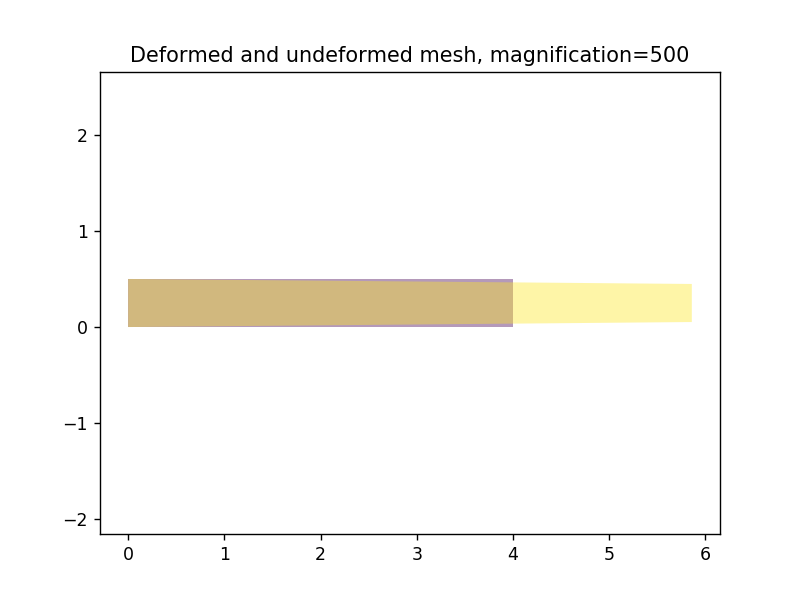

<IPython.core.display.Javascript object>


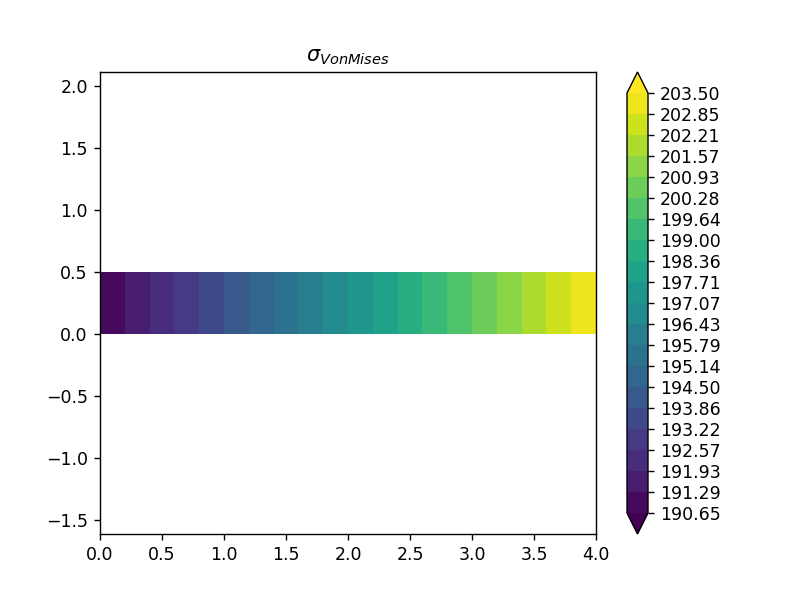

<IPython.core.display.Javascript object>


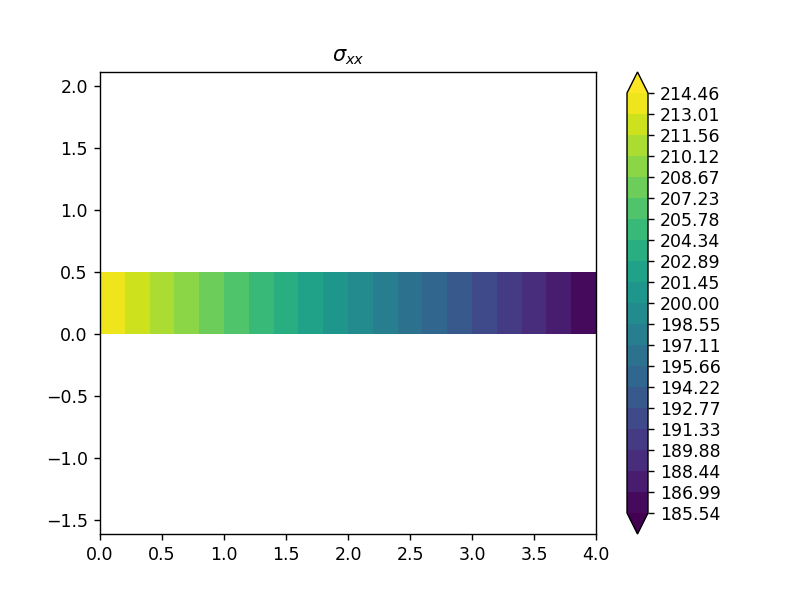

<IPython.core.display.Javascript object>


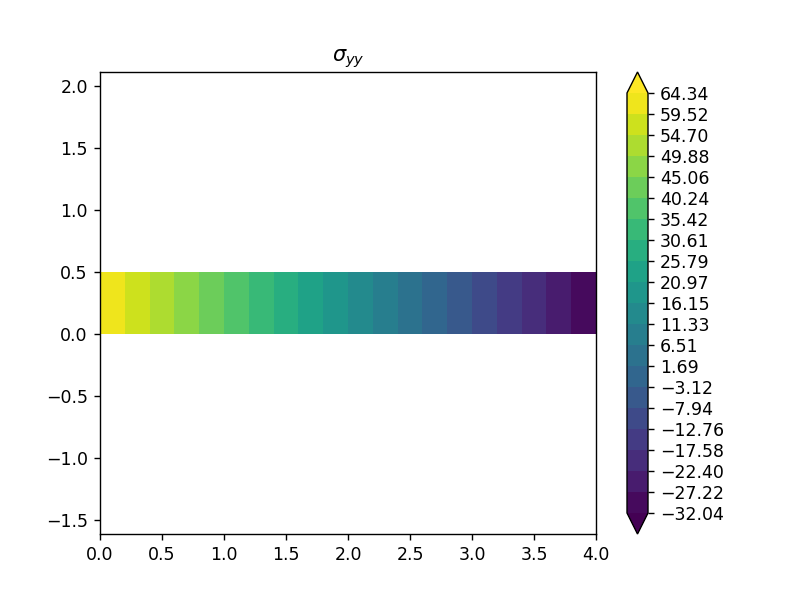

<IPython.core.display.Javascript object>


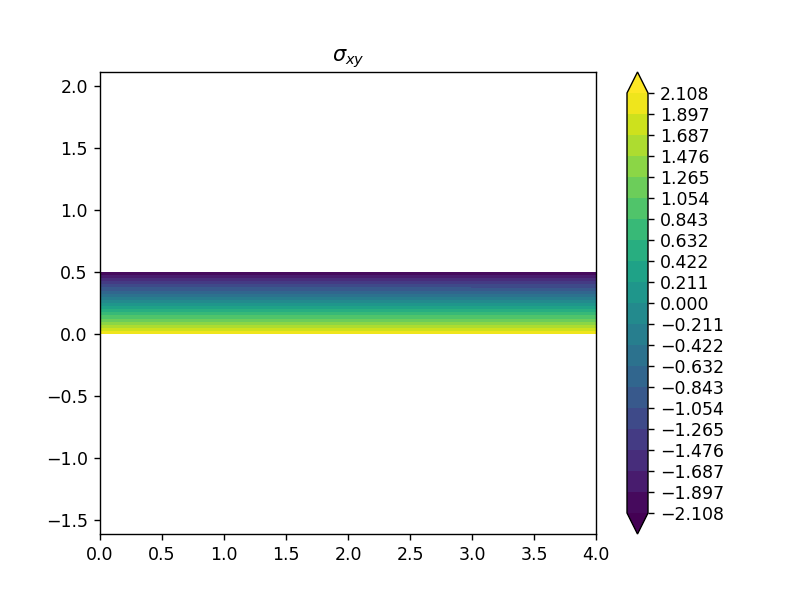

In [102]:
%matplotlib notebook
from fem_main_program_additional_outputs import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY, elnodes, coor, nelem, nnodes, U, fdof, pdof, KFF = launch_fem('q4_element_pull',MagFac=500)

<IPython.core.display.Javascript object>


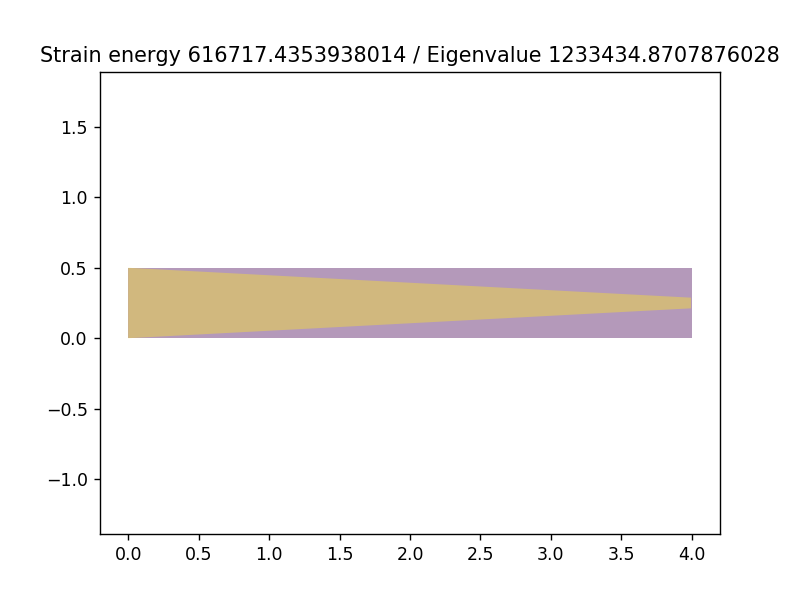

<IPython.core.display.Javascript object>


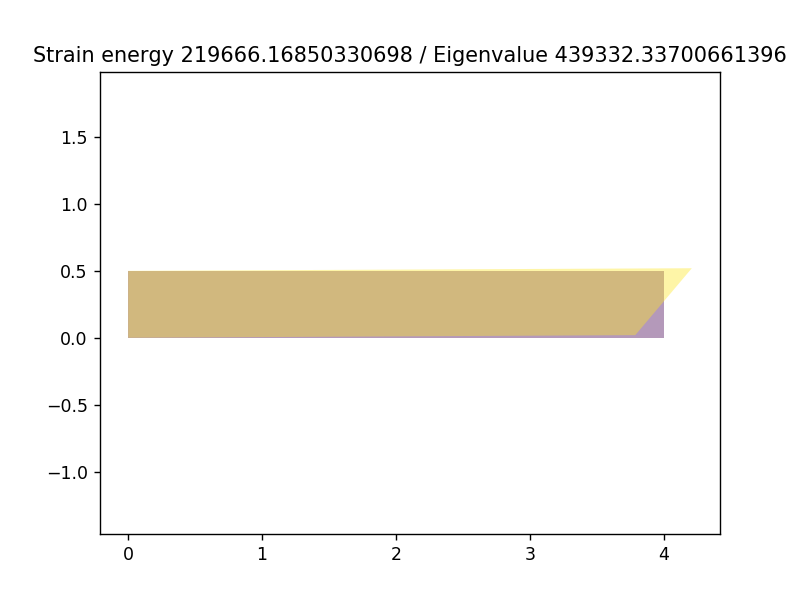

<IPython.core.display.Javascript object>


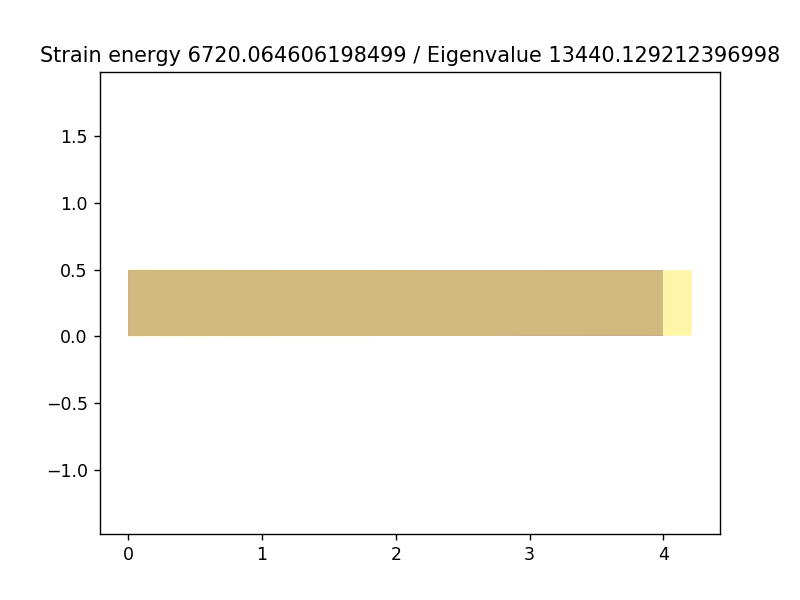

<IPython.core.display.Javascript object>


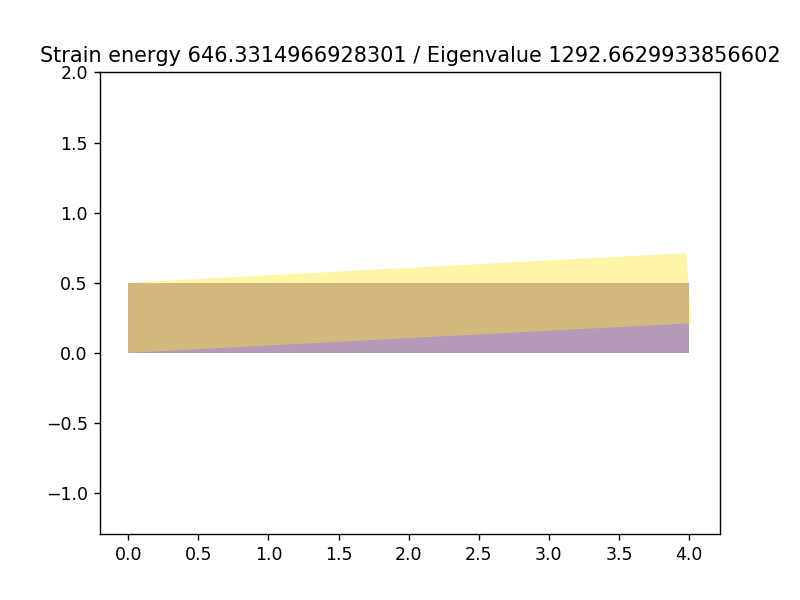

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from postprocess import PlotGeom

Eigenvalue, Eigenvector = np.linalg.eig(KFF)

for mode in range(len(fdof)):
    Umode = U.copy()
    Umode[fdof] = Eigenvector[:,mode]
    PlotGeom(elnodes,coor,nelem,nnodes,0.3,Umode)
    plt.title('Strain energy {} / Eigenvalue {}'.format(0.5*Eigenvalue[mode],Eigenvalue[mode]))

# Single Element Structure - Interpreting Displacements - Express as a linear combination of the eigenvectors $\boldsymbol{e}$
## $\boldsymbol{u}_{ff} = \sum_{i=0}^{modes} p_i \boldsymbol{e}_i$
## where $p_i$ indicates the ith participation coefficient of the ith eigenvector $\boldsymbol{e}_i$

In [106]:
ModeParticipation = np.linalg.solve(Eigenvector, U[fdof])
PercentageModeParticipation = ModeParticipation/np.sum(np.fabs(ModeParticipation))*100

print('Scaled Participation per mode / sign reflects sign of participation')
print(PercentageModeParticipation)

print('Strain energy per mode')
total_strain_energy = (0.5*U[fdof].T@KFF@U[fdof])[0,0]

strain_energies = []

for mode in range(len(fdof)):
    ScaledEigenvector = ModeParticipation[mode,0]*Eigenvector[:,mode]
    strain_energies.append((0.5*ScaledEigenvector.T@KFF@ScaledEigenvector)[0,0]/total_strain_energy*100)
    
strain_energies = np.reshape(strain_energies,(len(fdof),1))
print('Percentage strain energy per mode / sign reflects')
print(strain_energies)

Scaled Participation per mode / sign reflects sign of participation
[[-3.09324356e-02]
 [-2.47148453e-14]
 [ 9.99690676e+01]
 [-1.68335785e-13]]
Strain energy per mode
Percentage strain energy per mode / sign reflects
[[8.78629770e-04]
 [1.99788470e-28]
 [9.99991214e+01]
 [2.72709125e-29]]


# Single Element Structure - Bending

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0015 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0005 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


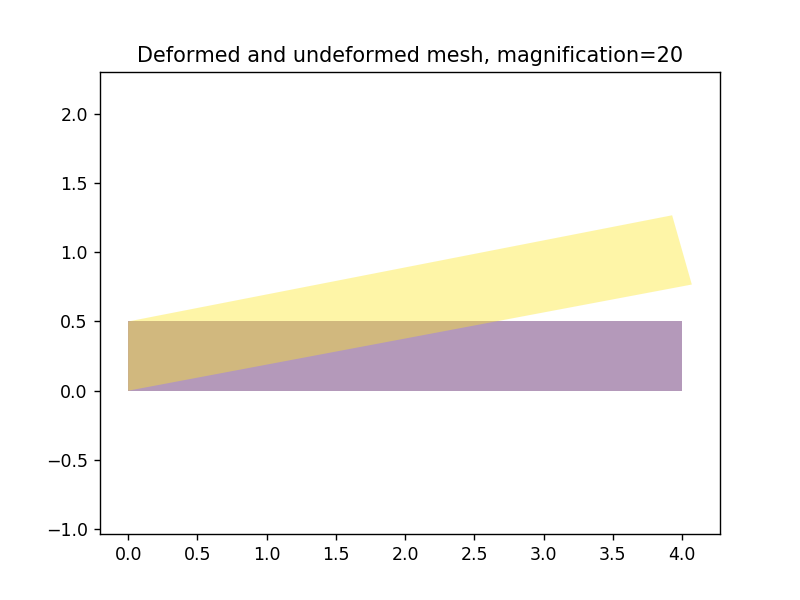

<IPython.core.display.Javascript object>


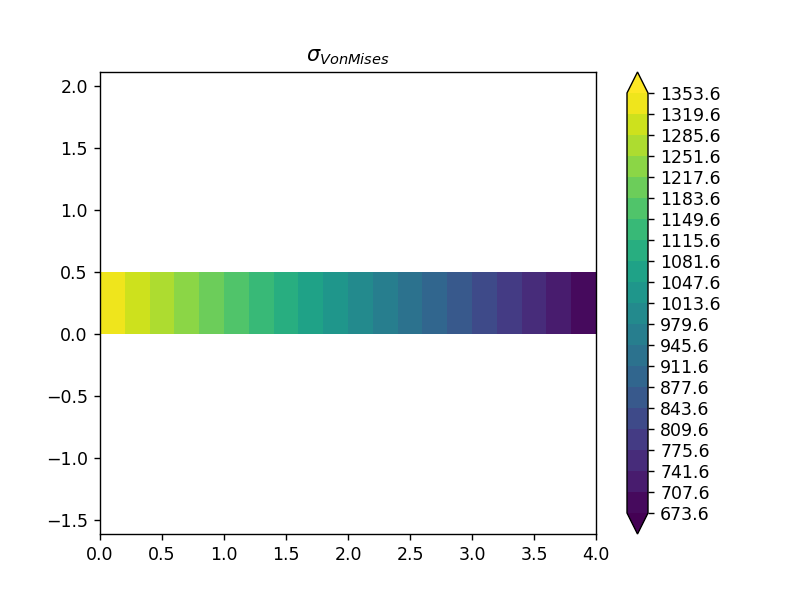

<IPython.core.display.Javascript object>


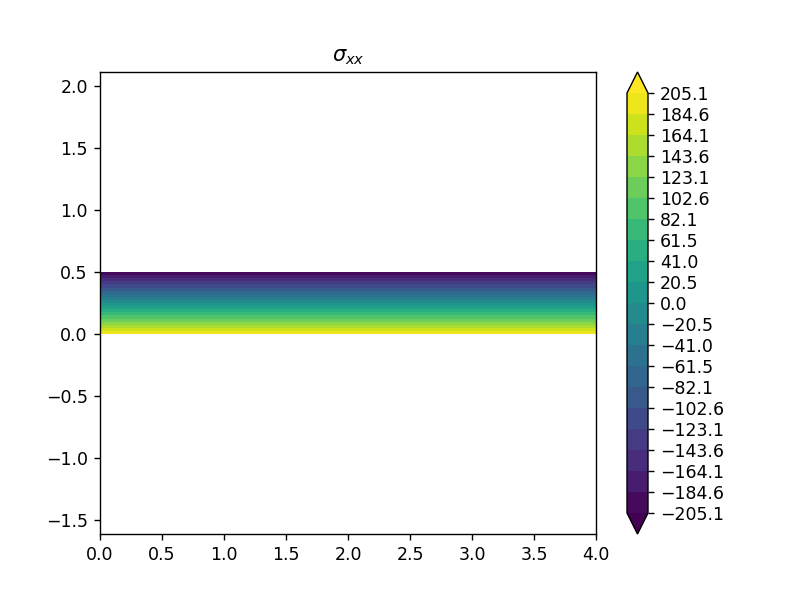

<IPython.core.display.Javascript object>


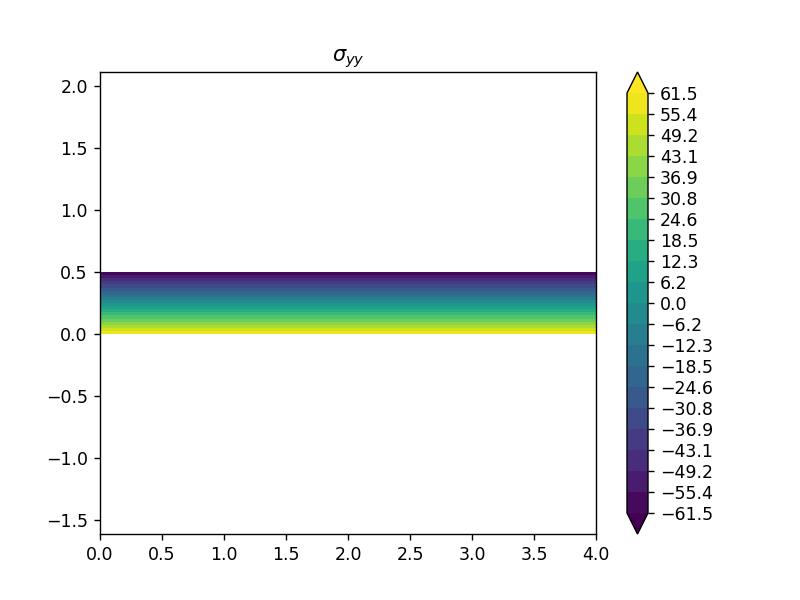

<IPython.core.display.Javascript object>


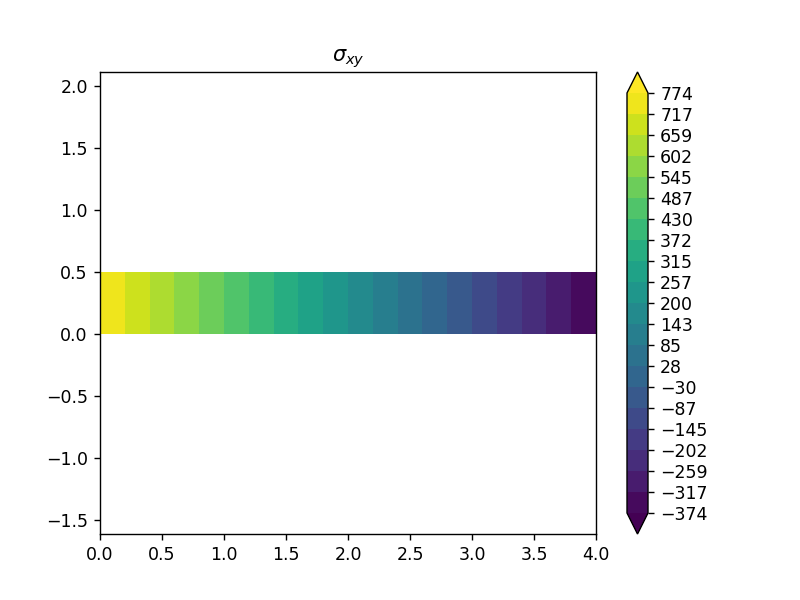

In [109]:
%matplotlib notebook
from fem_main_program_additional_outputs import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY, elnodes, coor, nelem, nnodes, U, fdof, pdof, KFF = launch_fem('q4_element_bend',MagFac=20)

In [110]:
ModeParticipation = np.linalg.solve(Eigenvector, U[fdof])
PercentageModeParticipation = ModeParticipation/np.sum(np.fabs(ModeParticipation))*100

print('Scaled Participation per mode / sign reflects sign of participation')
print(ModeParticipation/np.sum(np.fabs(ModeParticipation))*100)

print('Strain energy per mode')
total_strain_energy = (0.5*U[fdof].T@KFF@U[fdof])[0,0]

strain_energies = []

for mode in range(len(fdof)):
    ScaledEigenvector = ModeParticipation[mode,0]*Eigenvector[:,mode]
    strain_energies.append((0.5*ScaledEigenvector.T@KFF@ScaledEigenvector)[0,0]/total_strain_energy*100)
    
strain_energies = np.reshape(strain_energies,(len(fdof),1))
print('Percentage strain energy per mode / sign reflects')
print(strain_energies)

Scaled Participation per mode / sign reflects sign of participation
[[ 7.61672717e-15]
 [ 2.73536443e-02]
 [-1.19666231e-13]
 [ 9.99726464e+01]]
Strain energy per mode
Percentage strain energy per mode / sign reflects
[[5.53852702e-28]
 [2.54427950e-03]
 [1.48966264e-27]
 [9.99974557e+01]]


# Multiple Q4 Element Structure - Two Point Loads Bending

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0000 seconds.
Done assembling K and F    :   0.0070 seconds.
Done solving system        :   0.0010 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0070 seconds.
Done post-processing stress:   0.0050 seconds.
Done writing output        :   0.0030 seconds.


<IPython.core.display.Javascript object>


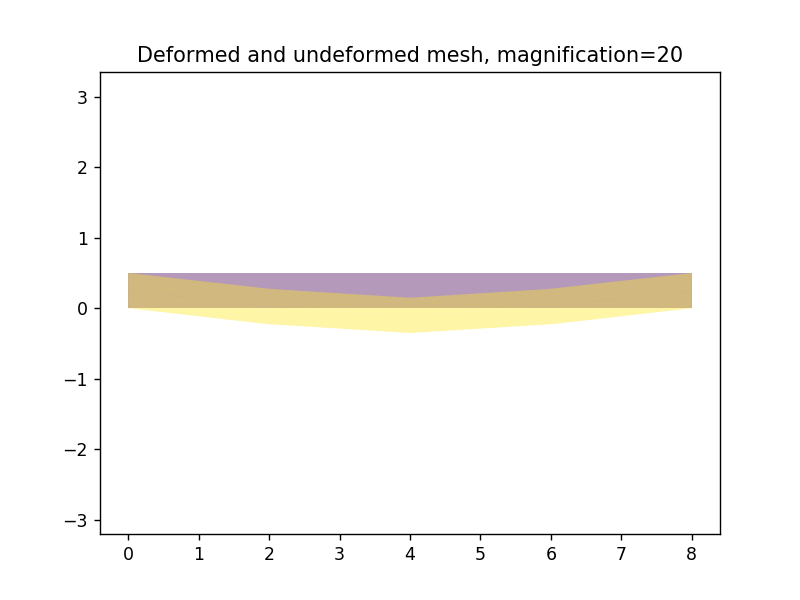

<IPython.core.display.Javascript object>


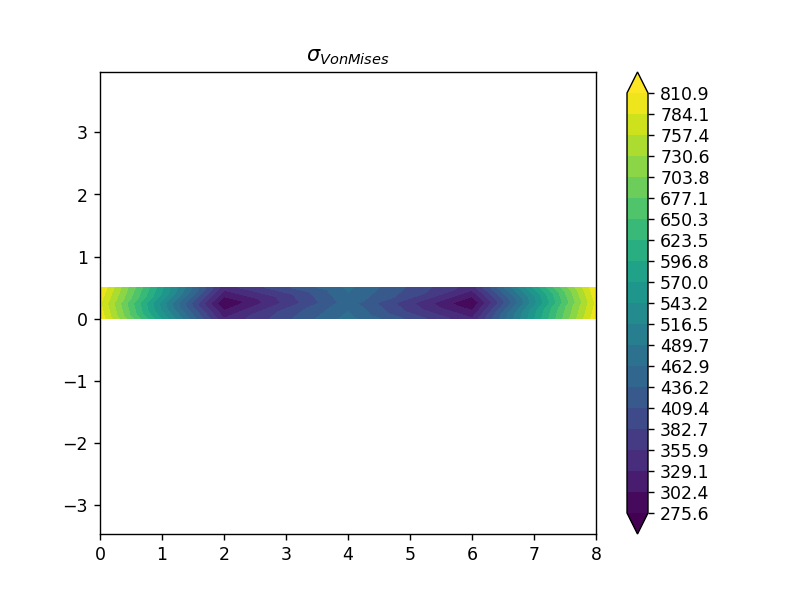

<IPython.core.display.Javascript object>


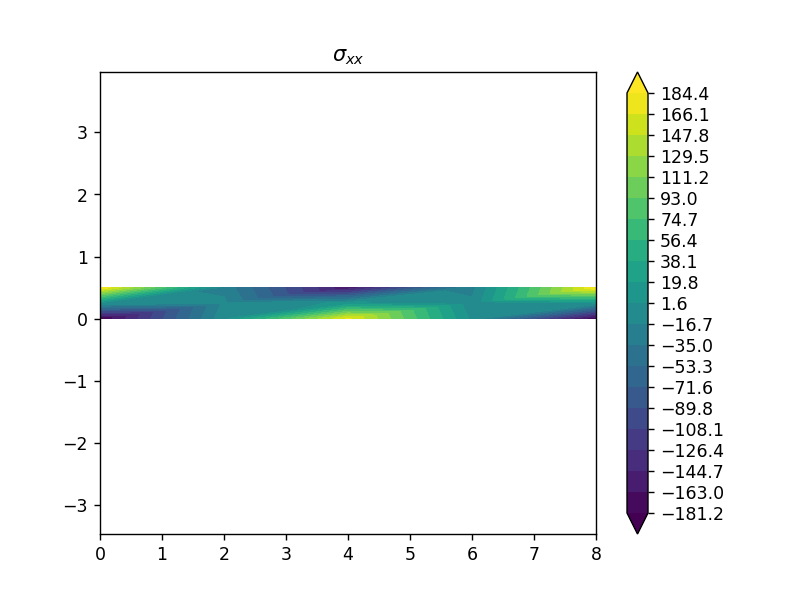

<IPython.core.display.Javascript object>


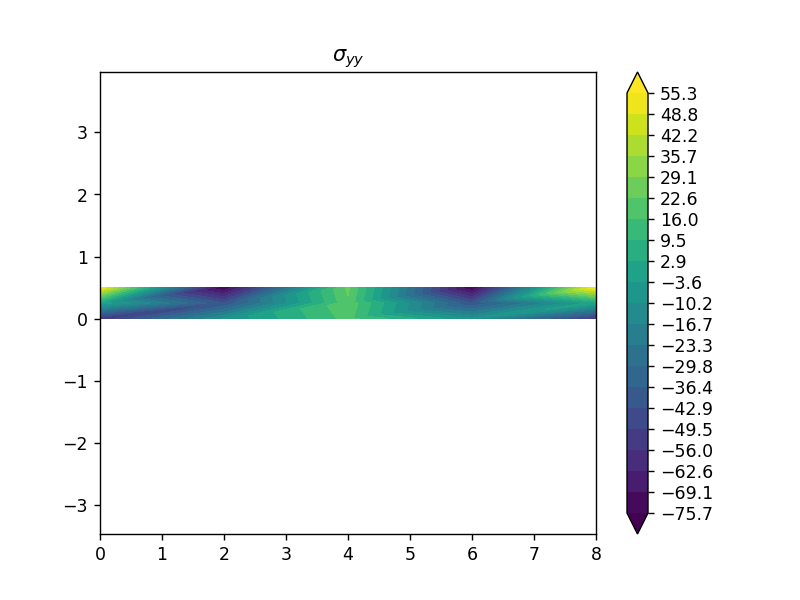

<IPython.core.display.Javascript object>


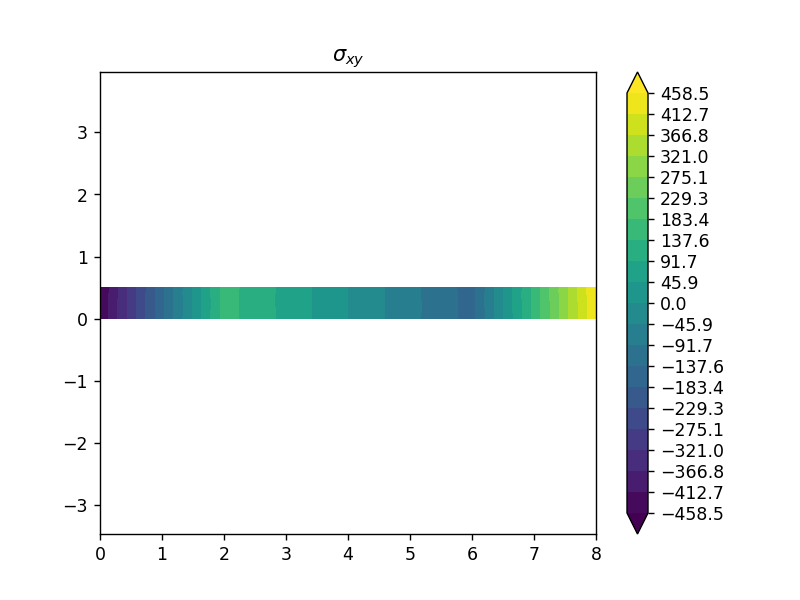

In [125]:
%matplotlib notebook
from fem_main_program_additional_outputs import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY, elnodes, coor, nelem, nnodes, U, fdof, pdof, KFF = launch_fem('q4_bar',MagFac=20)

# Structural deformation modes

<IPython.core.display.Javascript object>


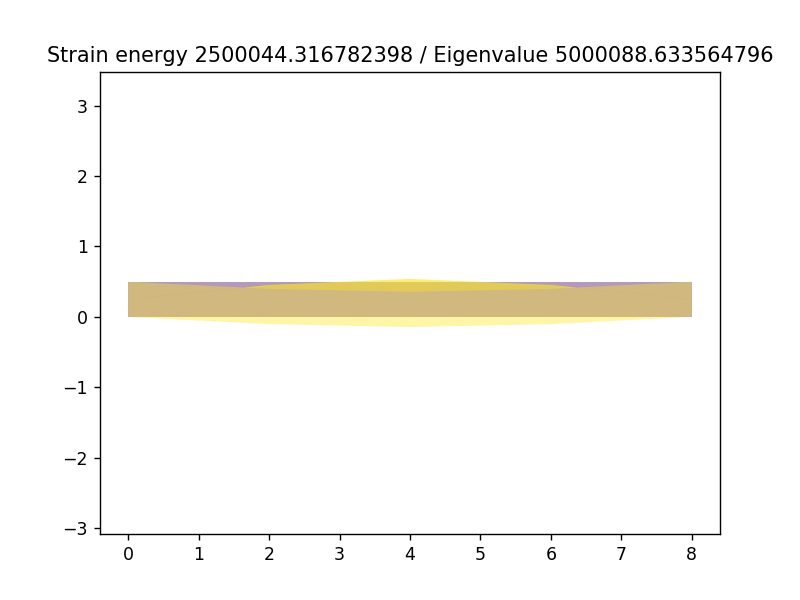

<IPython.core.display.Javascript object>


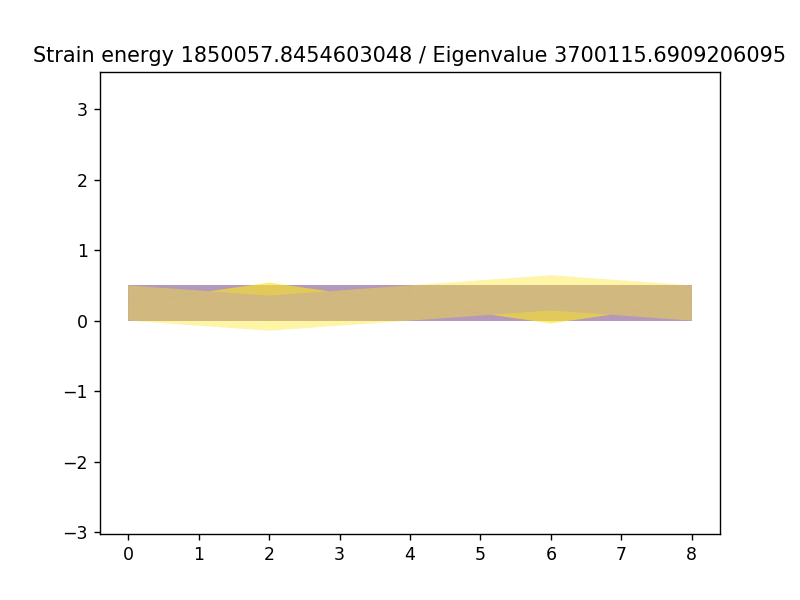

<IPython.core.display.Javascript object>


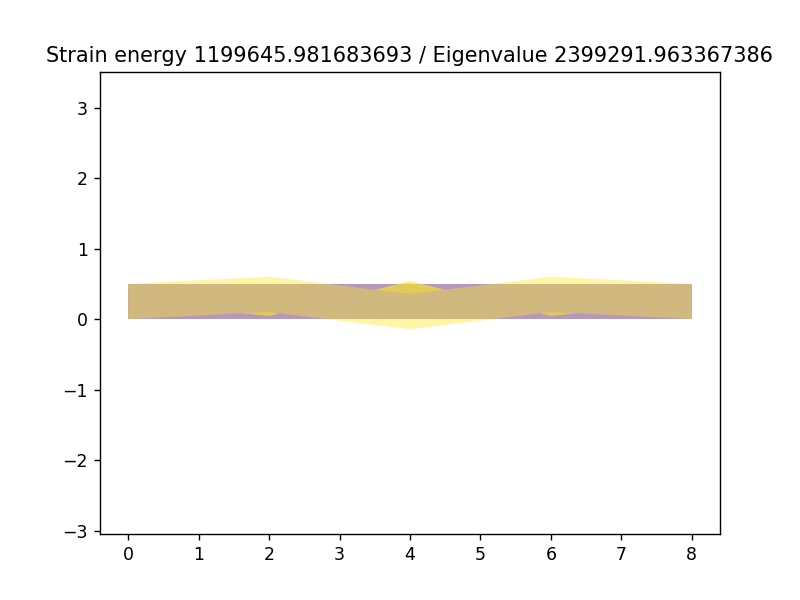

<IPython.core.display.Javascript object>


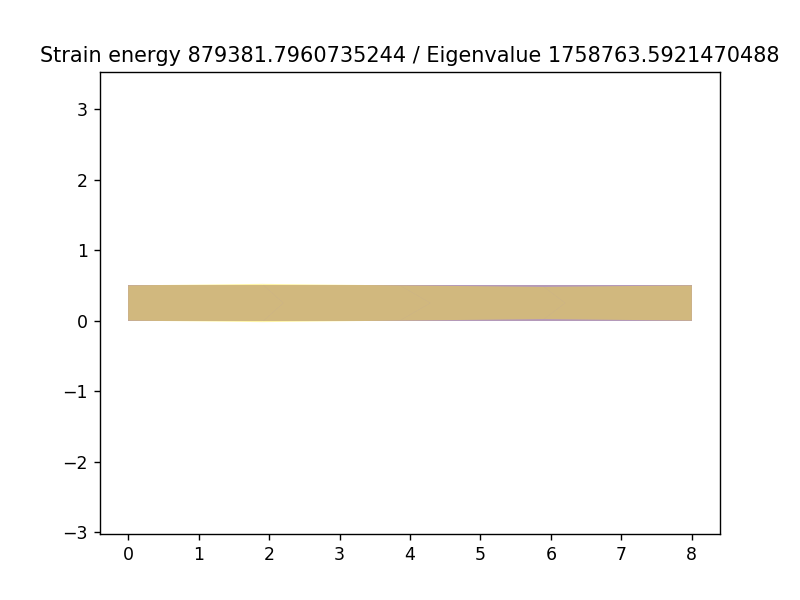

<IPython.core.display.Javascript object>


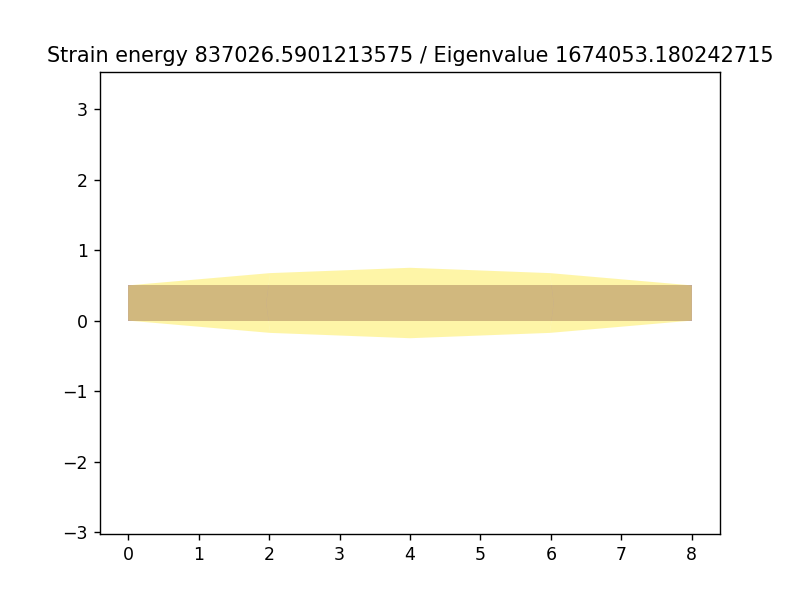

<IPython.core.display.Javascript object>


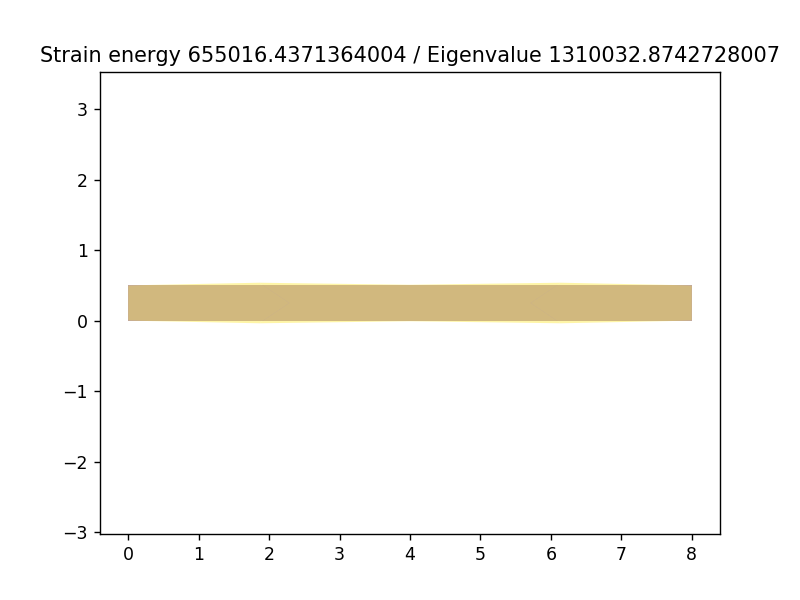

<IPython.core.display.Javascript object>


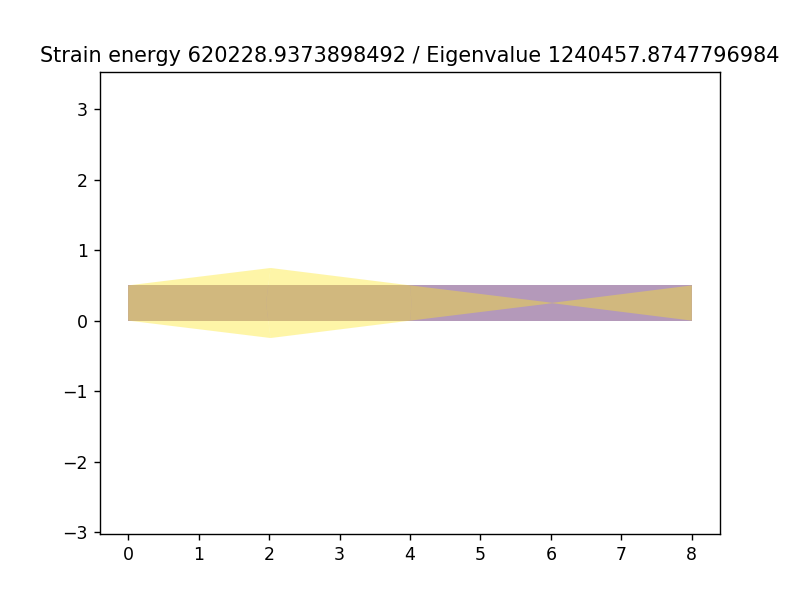

<IPython.core.display.Javascript object>


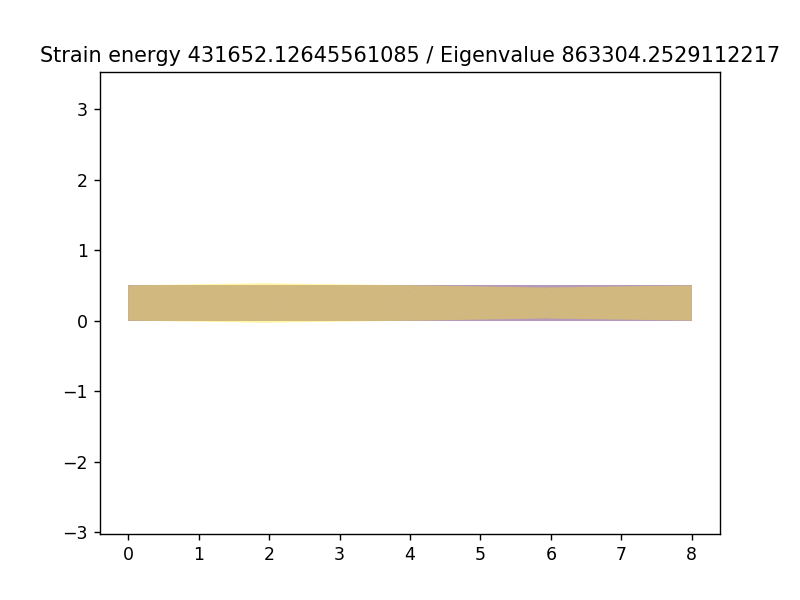

<IPython.core.display.Javascript object>


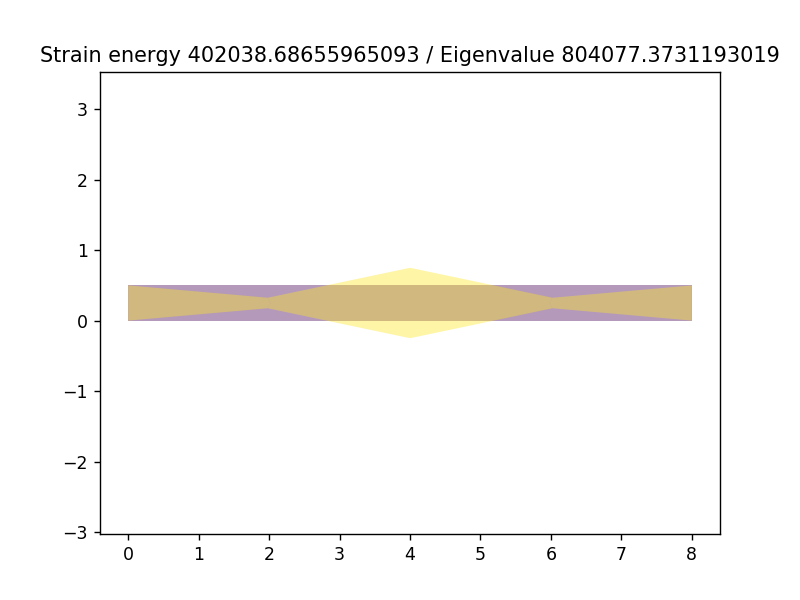

<IPython.core.display.Javascript object>


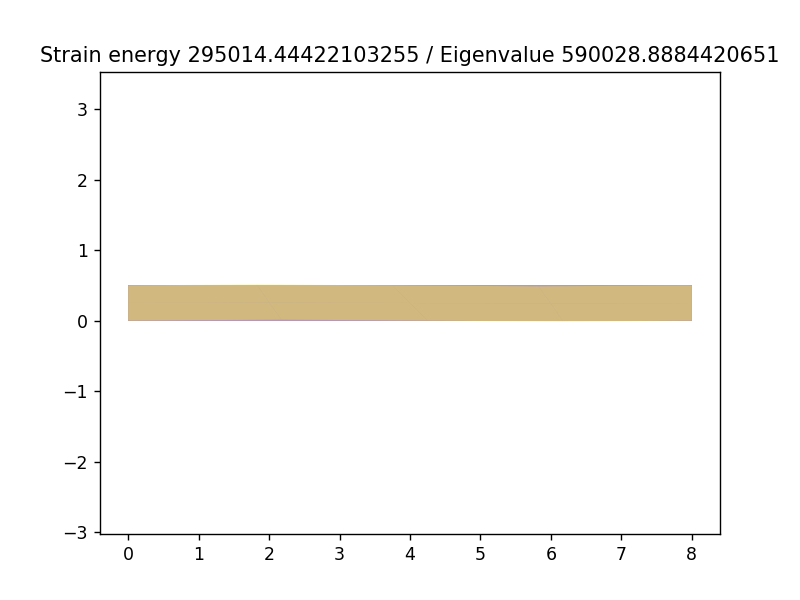

<IPython.core.display.Javascript object>


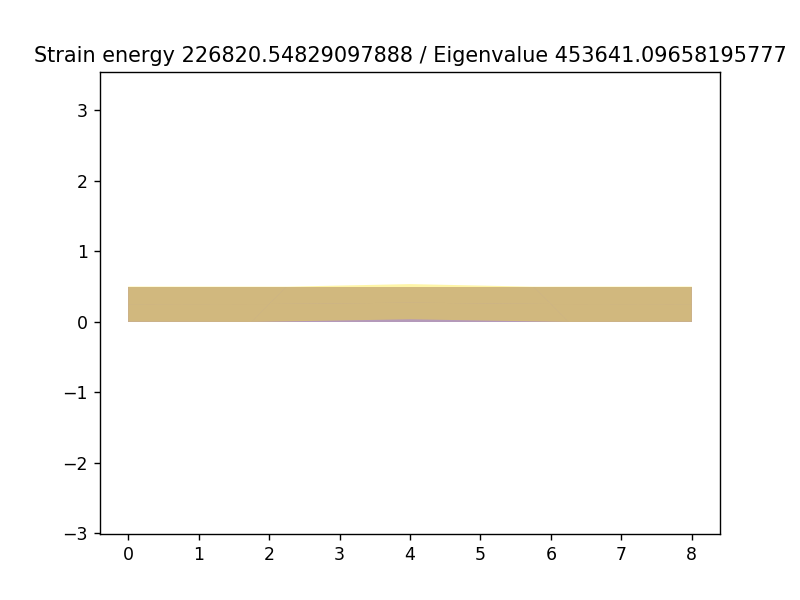

<IPython.core.display.Javascript object>


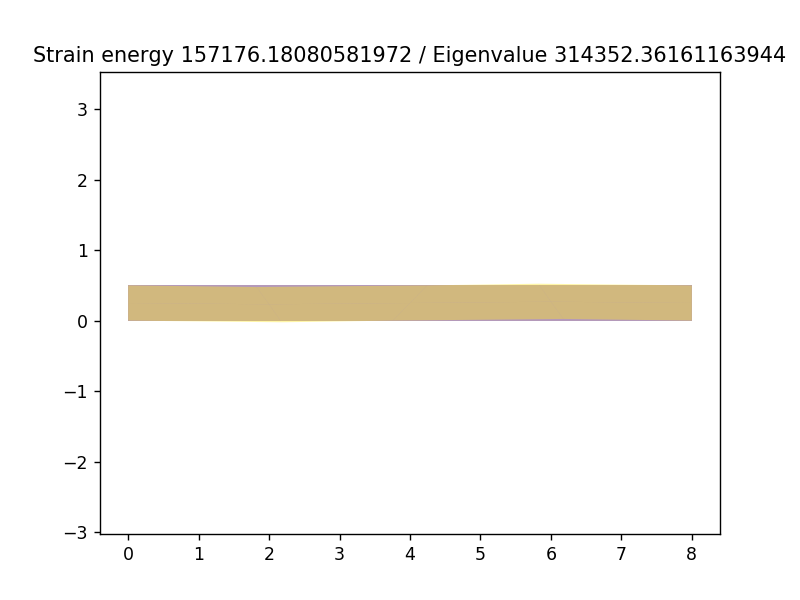

<IPython.core.display.Javascript object>


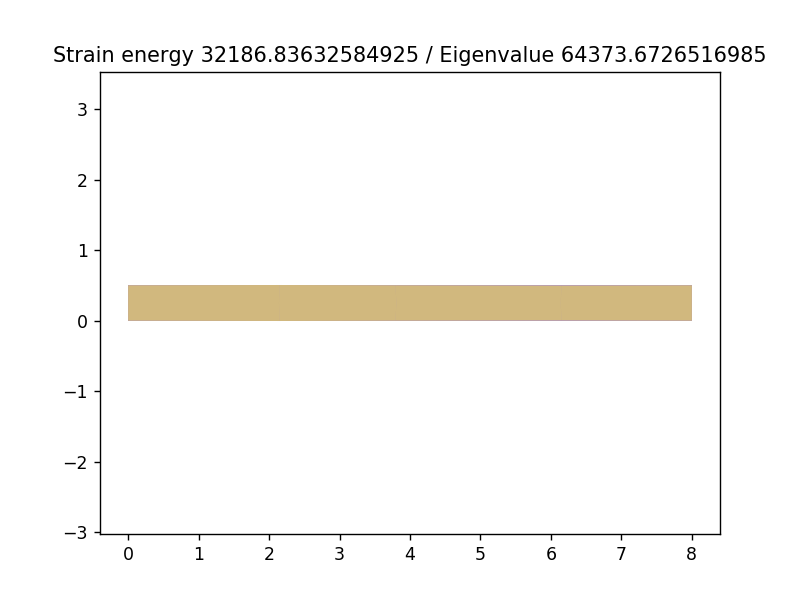

<IPython.core.display.Javascript object>


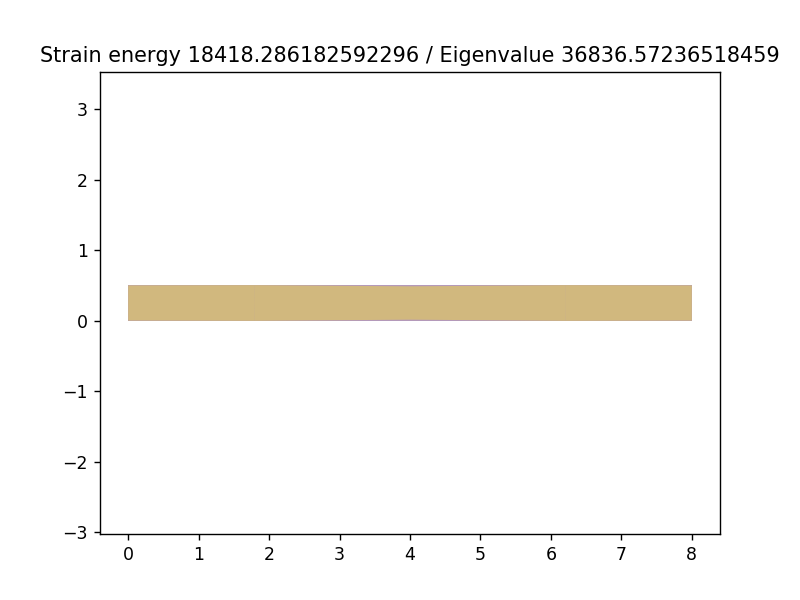

<IPython.core.display.Javascript object>


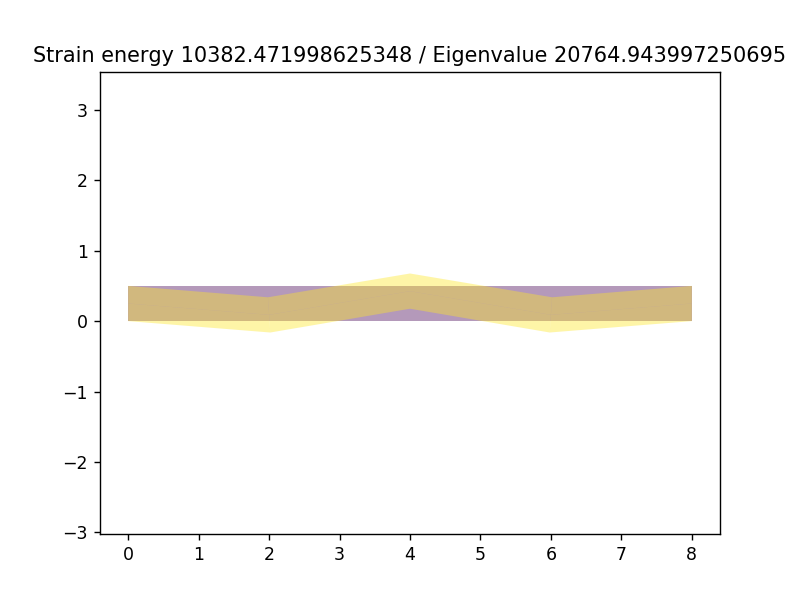

C:\Users\User\Desktop\MKM321\notebooks\FEMCODE2D_PYTHON\UPLOAD_STRAINENERGY_STRUCTURAL_MODES\postprocess.py:158: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1, ax1 = mpl.subplots()


<IPython.core.display.Javascript object>


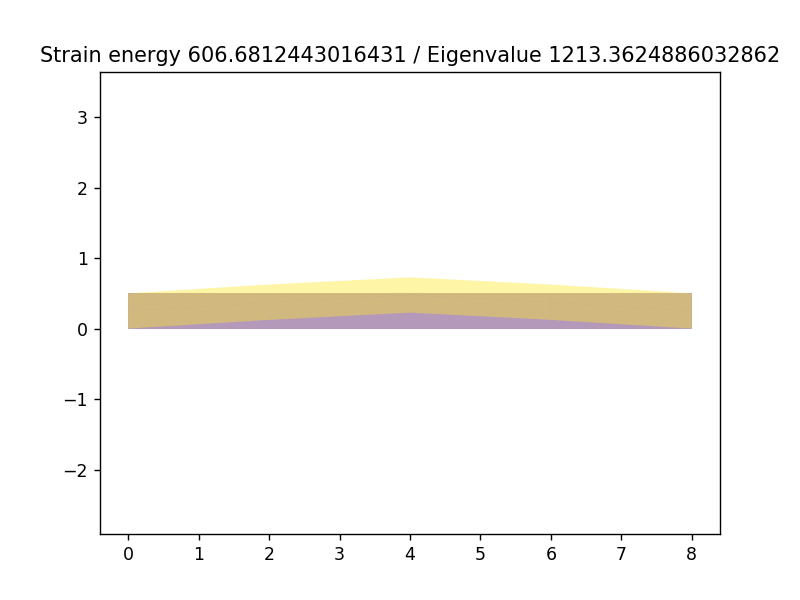

<IPython.core.display.Javascript object>


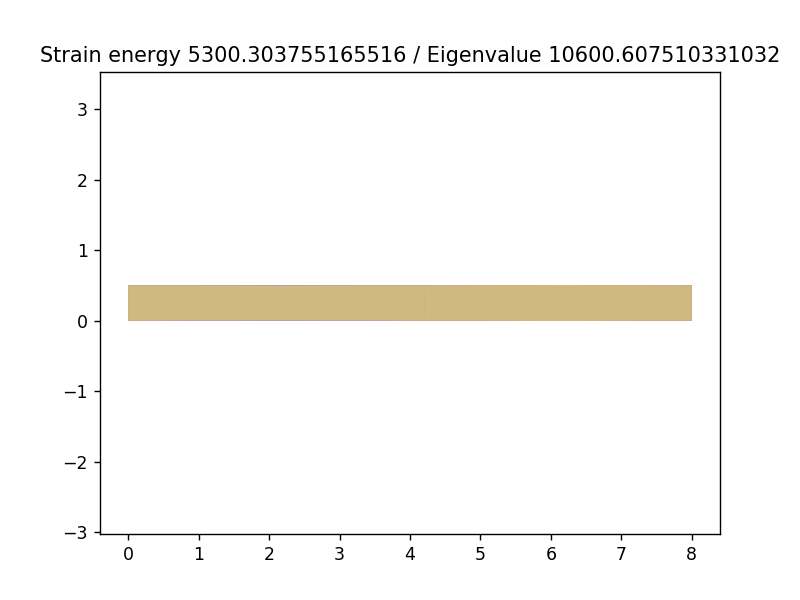

<IPython.core.display.Javascript object>


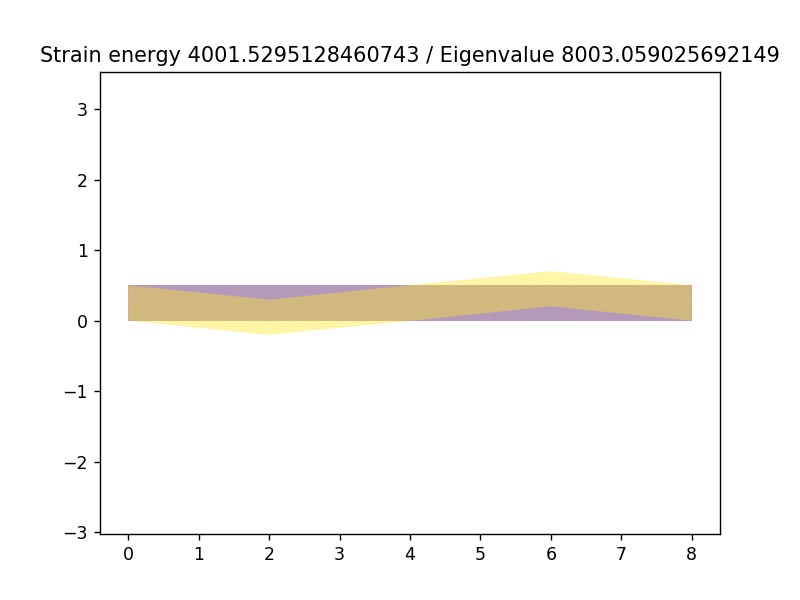

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from postprocess import PlotGeom

Eigenvalue, Eigenvector = np.linalg.eig(KFF)

for mode in range(len(fdof)):
    Umode = U.copy()
    Umode[fdof] = Eigenvector[:,mode]
    PlotGeom(elnodes,coor,nelem,nnodes,0.5,Umode)
    plt.title('Strain energy {} / Eigenvalue {}'.format(0.5*Eigenvalue[mode],Eigenvalue[mode]))

# Multiple Element Structure - Interpreting Displacements - Express as a linear combination of the eigenvectors $\boldsymbol{e}$
## $\boldsymbol{u}_{ff} = \sum_{i=0}^{modes} p_i \boldsymbol{e}_i$
## where $p_i$ indicates the ith participation coefficient of the ith eigenvector $\boldsymbol{e}_i$

In [127]:
ModeParticipation = np.linalg.solve(Eigenvector, U[fdof])
PercentageModeParticipation = ModeParticipation/np.sum(np.fabs(ModeParticipation))*100

print('Scaled Participation per mode / sign reflects sign of participation')
print(ModeParticipation/np.sum(np.fabs(ModeParticipation))*100)

print('Strain energy per mode')
total_strain_energy = (0.5*U[fdof].T@KFF@U[fdof])[0,0]

strain_energies = []

for mode in range(len(fdof)):
    ScaledEigenvector = ModeParticipation[mode,0]*Eigenvector[:,mode]
    strain_energies.append((0.5*ScaledEigenvector.T@KFF@ScaledEigenvector)[0,0]/total_strain_energy*100)
    
strain_energies = np.reshape(strain_energies,(len(fdof),1))
print('Percentage strain energy per mode / sign reflects')
print(strain_energies)

Scaled Participation per mode / sign reflects sign of participation
[[ 1.83323681e-02]
 [-1.08272974e-14]
 [-3.80457985e-02]
 [ 8.25597864e-15]
 [-9.34664159e-02]
 [-2.59303781e-02]
 [ 4.90606861e-14]
 [-1.09638255e-14]
 [ 1.95957222e-01]
 [-8.64830478e-16]
 [ 3.33488066e-03]
 [-4.42584938e-15]
 [-2.87921506e-14]
 [-8.22706532e-02]
 [ 6.99971580e+00]
 [-9.25429465e+01]
 [ 4.25263898e-13]
 [ 1.13288084e-14]]
Strain energy per mode
Percentage strain energy per mode / sign reflects
[[1.46624000e-02]
 [3.78482370e-27]
 [3.03030768e-02]
 [1.04600753e-27]
 [1.27605869e-01]
 [7.68581830e-03]
 [2.60519045e-26]
 [9.05478892e-28]
 [2.69408077e-01]
 [3.85057397e-30]
 [4.40213350e-05]
 [5.37279425e-29]
 [4.65636180e-28]
 [2.17550119e-03]
 [8.87731846e+00]
 [9.06707968e+01]
 [1.67277684e-26]
 [8.96220154e-30]]


# Multiple Q8 Element Structure - Two Point Loads

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0010 seconds.
Done assembling K and F    :   0.0070 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0010 seconds.
Done computing stresses    :   0.0030 seconds.
Done post-processing stress:   0.0030 seconds.
Done writing output        :   0.0020 seconds.


<IPython.core.display.Javascript object>


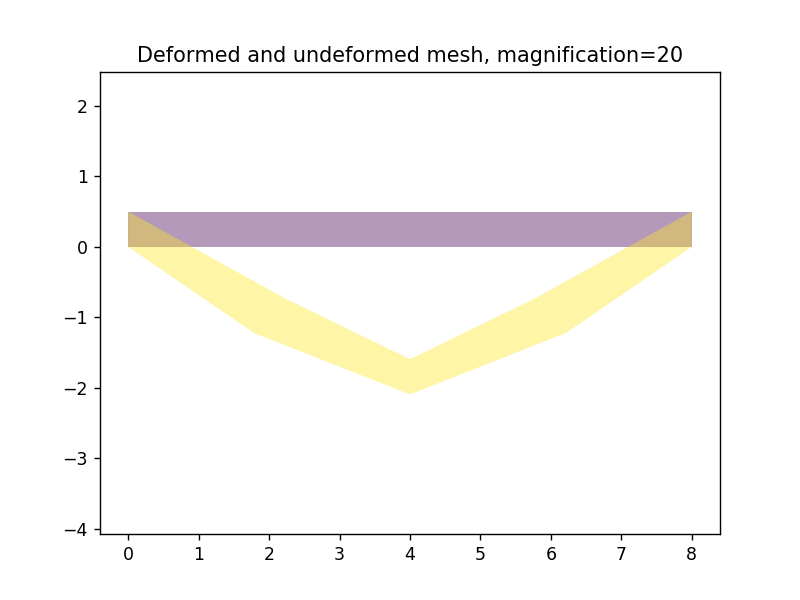

<IPython.core.display.Javascript object>


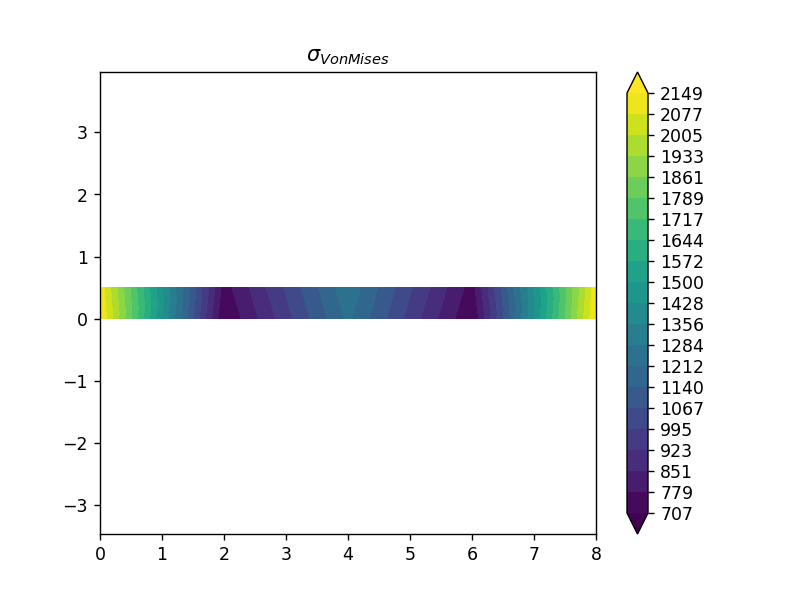

<IPython.core.display.Javascript object>


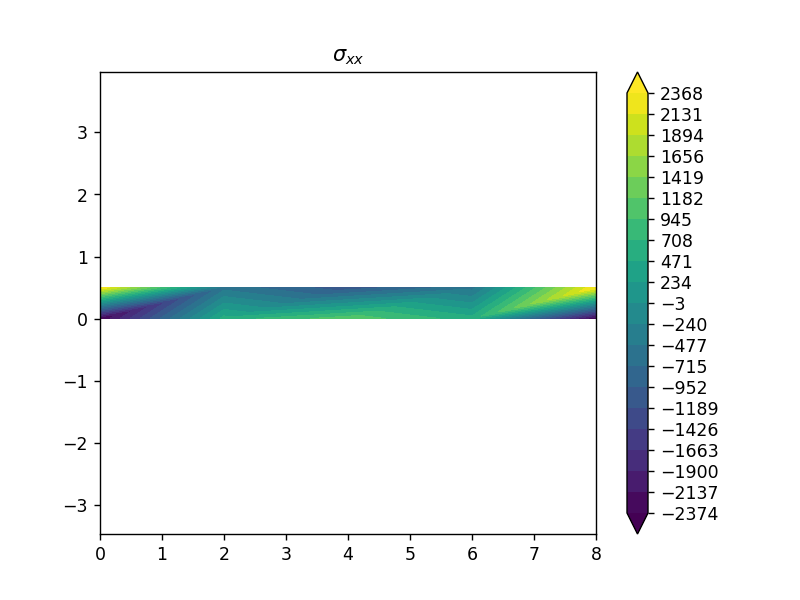

<IPython.core.display.Javascript object>


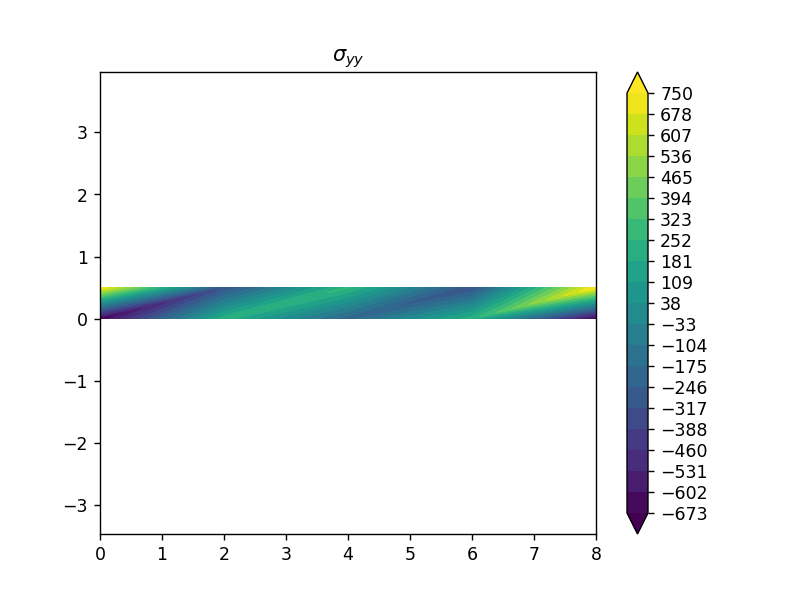

<IPython.core.display.Javascript object>


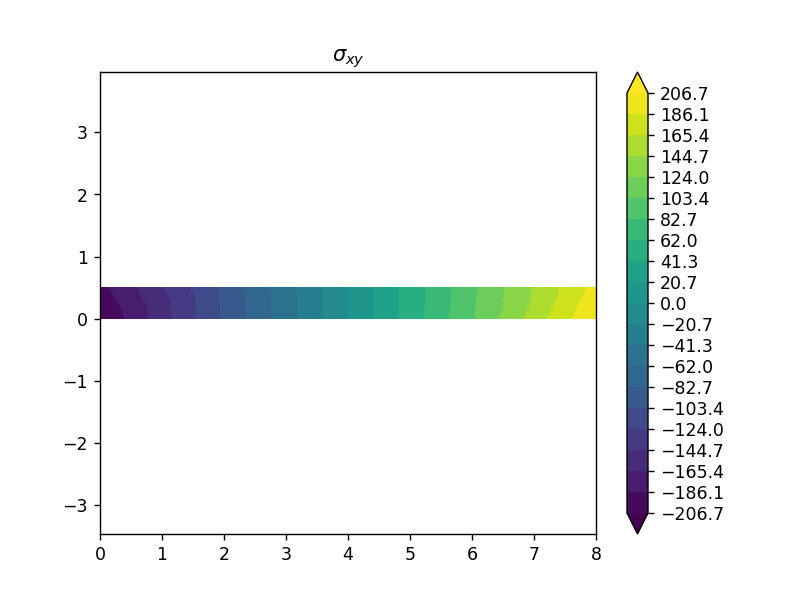

In [129]:
%matplotlib notebook
from fem_main_program_additional_outputs import launch_fem

U, ReactionForces, VonMises, SXX, SYY, SXY, elnodes, coor, nelem, nnodes, U, fdof, pdof, KFF = launch_fem('q8_bar',MagFac=20)

# Structural deformation modes

<IPython.core.display.Javascript object>


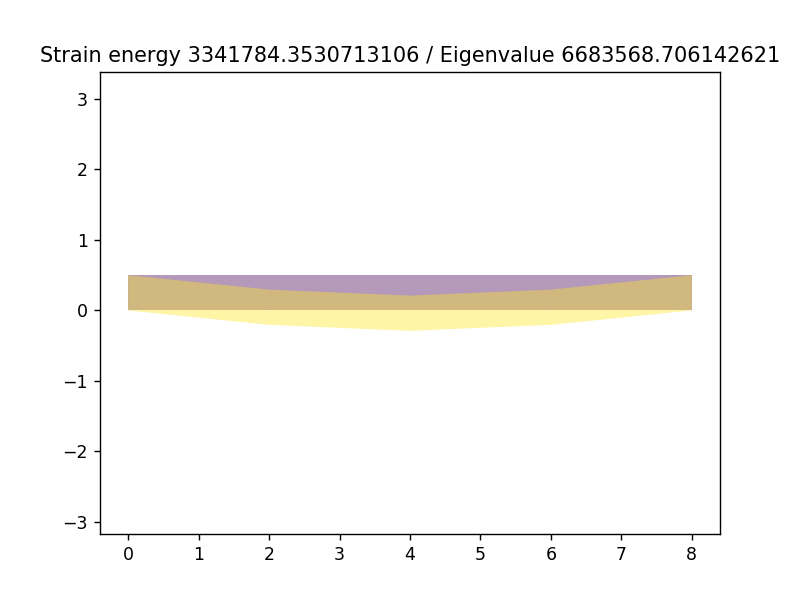

<IPython.core.display.Javascript object>


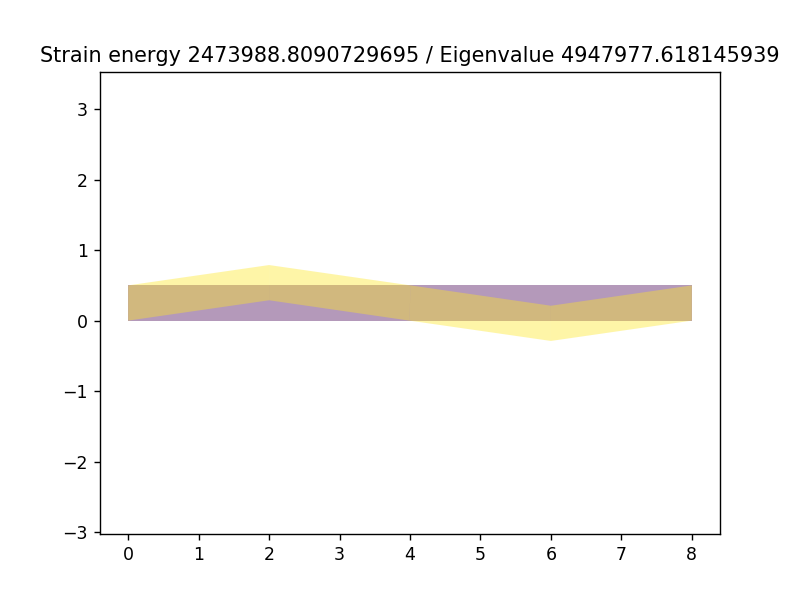

<IPython.core.display.Javascript object>


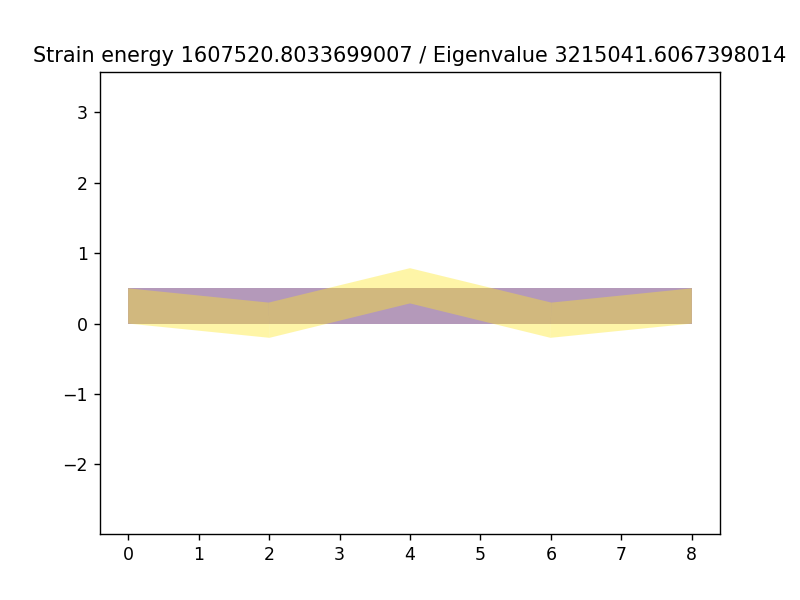

<IPython.core.display.Javascript object>


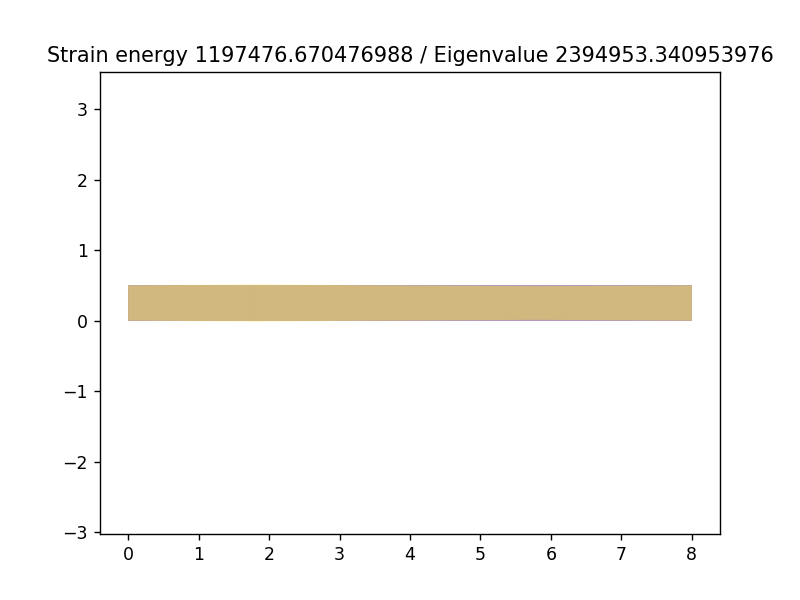

<IPython.core.display.Javascript object>


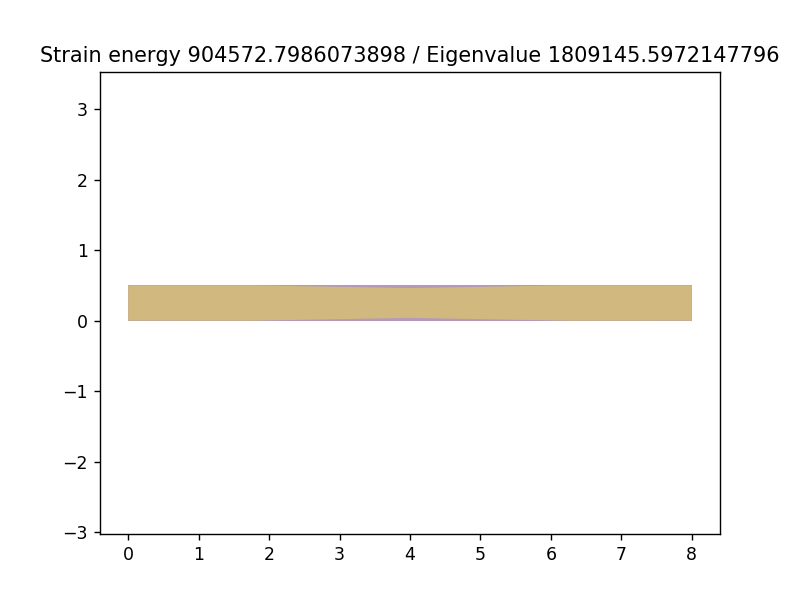

<IPython.core.display.Javascript object>


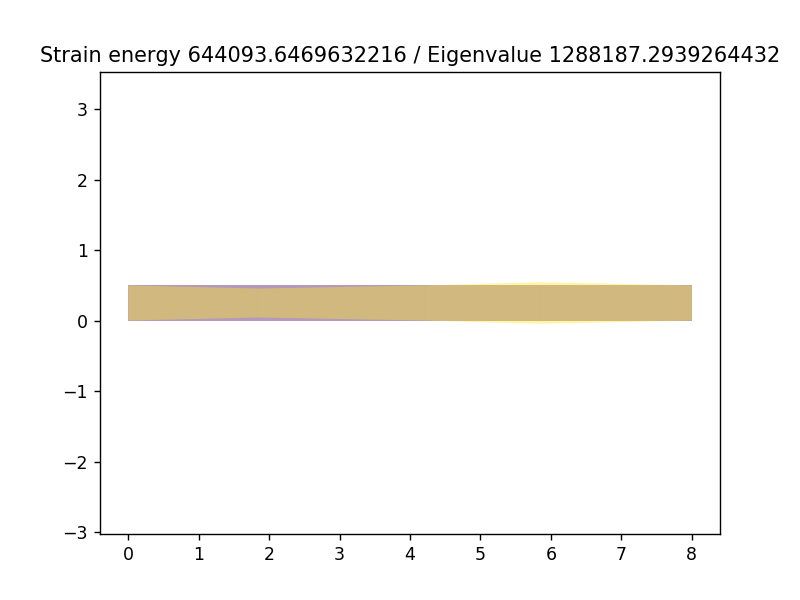

<IPython.core.display.Javascript object>


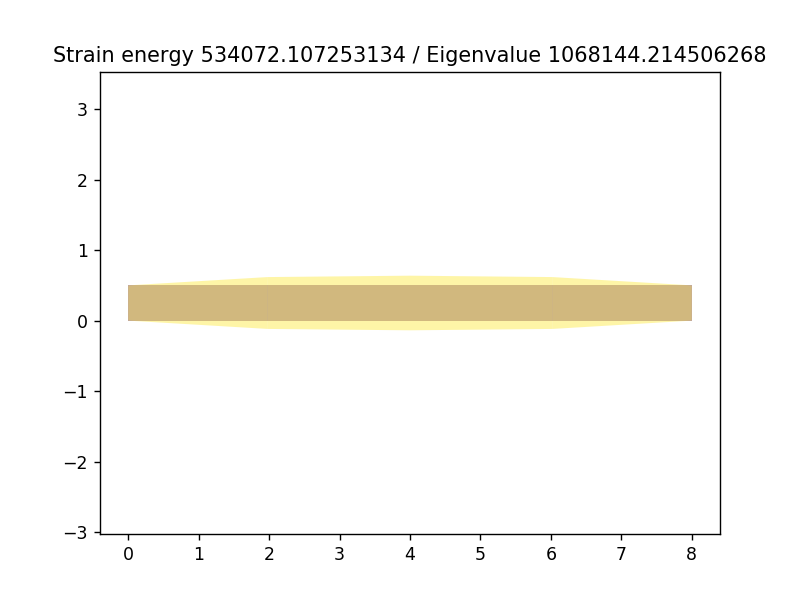

<IPython.core.display.Javascript object>


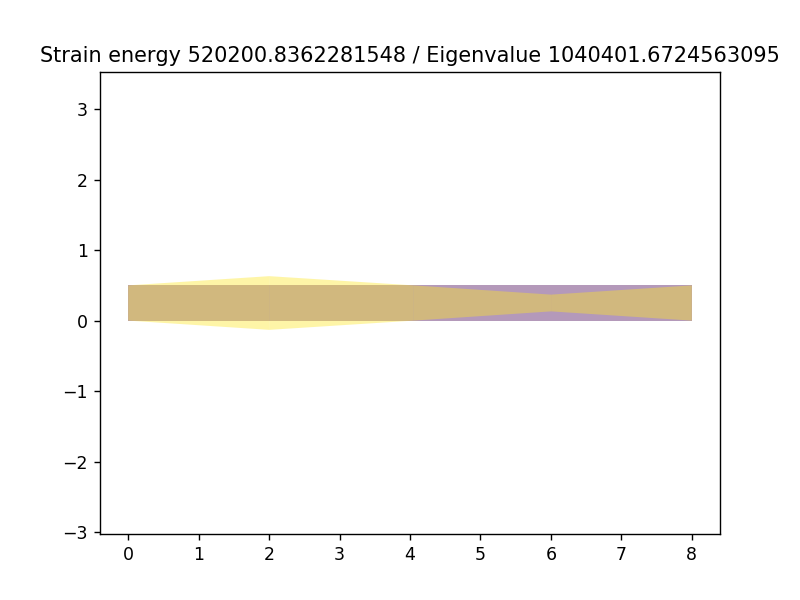

<IPython.core.display.Javascript object>


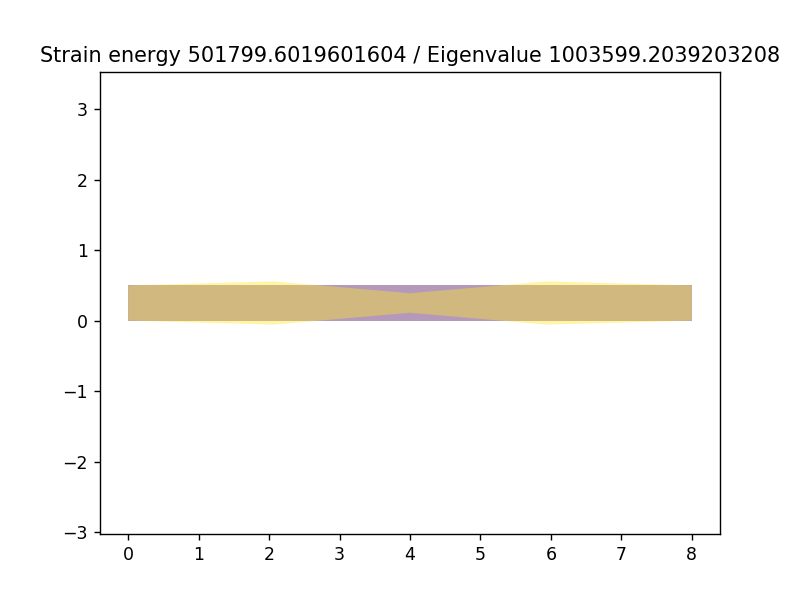

<IPython.core.display.Javascript object>


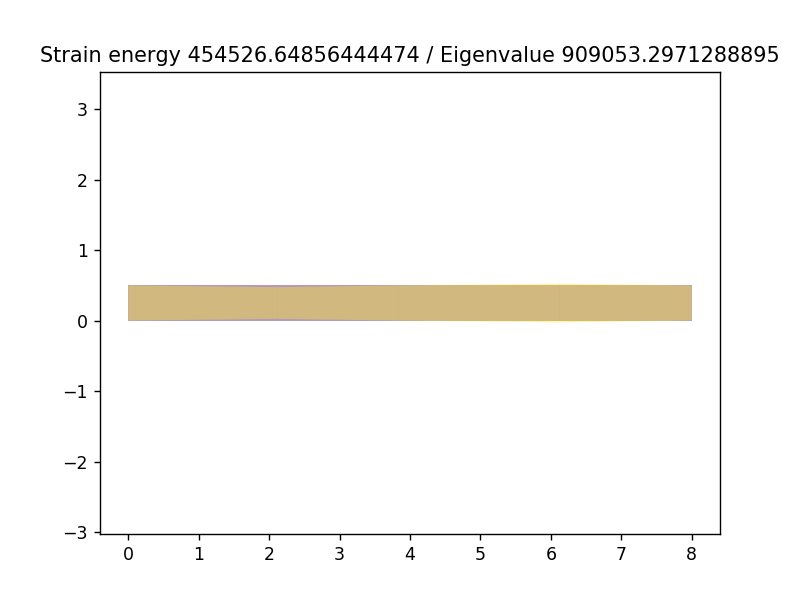

<IPython.core.display.Javascript object>


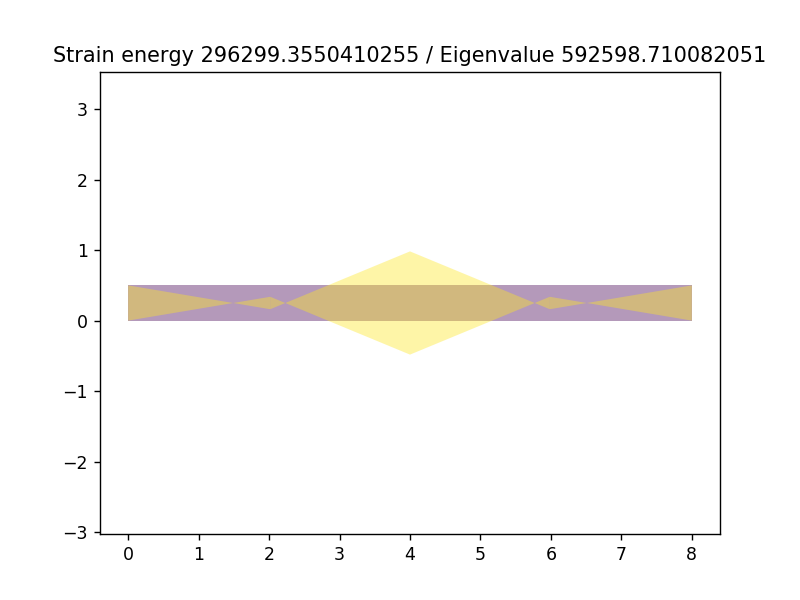

<IPython.core.display.Javascript object>


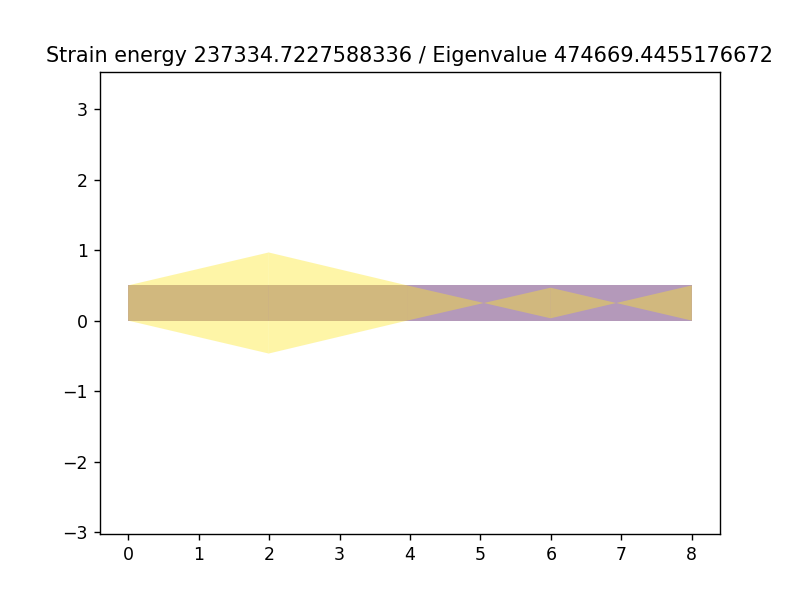

<IPython.core.display.Javascript object>


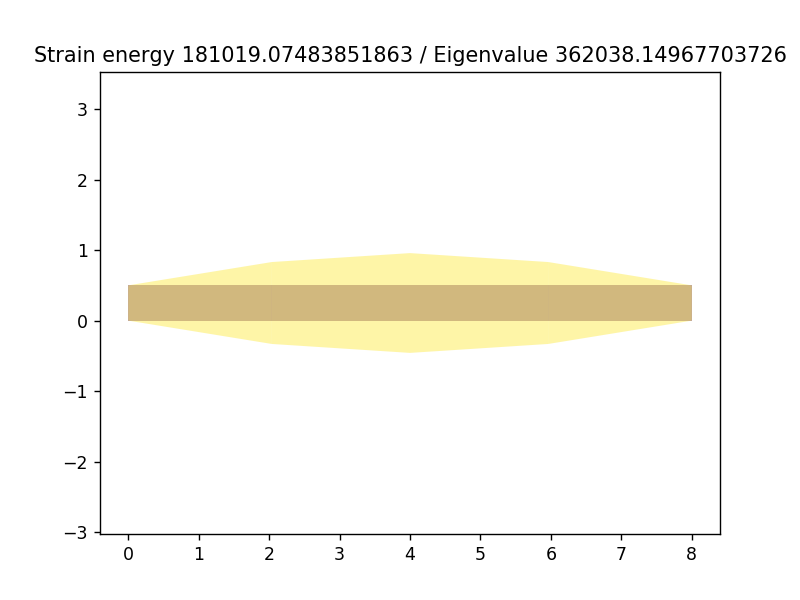

<IPython.core.display.Javascript object>


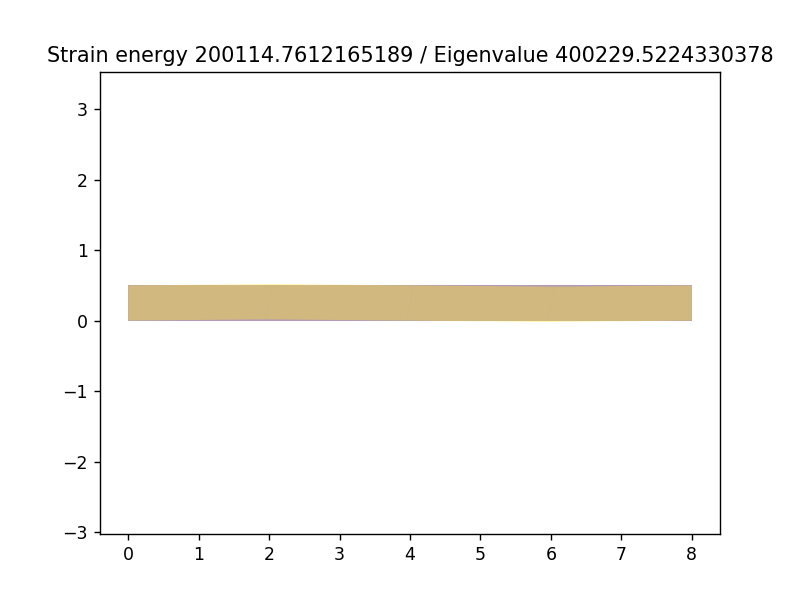

<IPython.core.display.Javascript object>


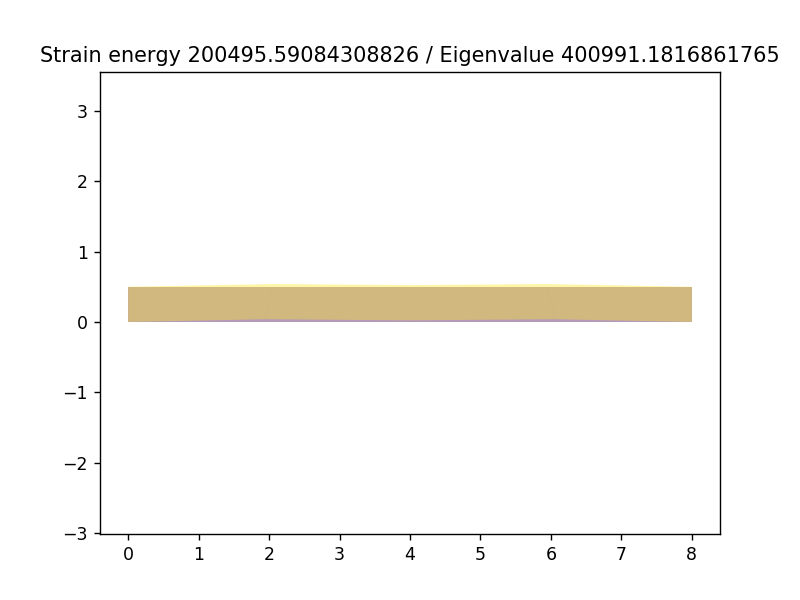

<IPython.core.display.Javascript object>


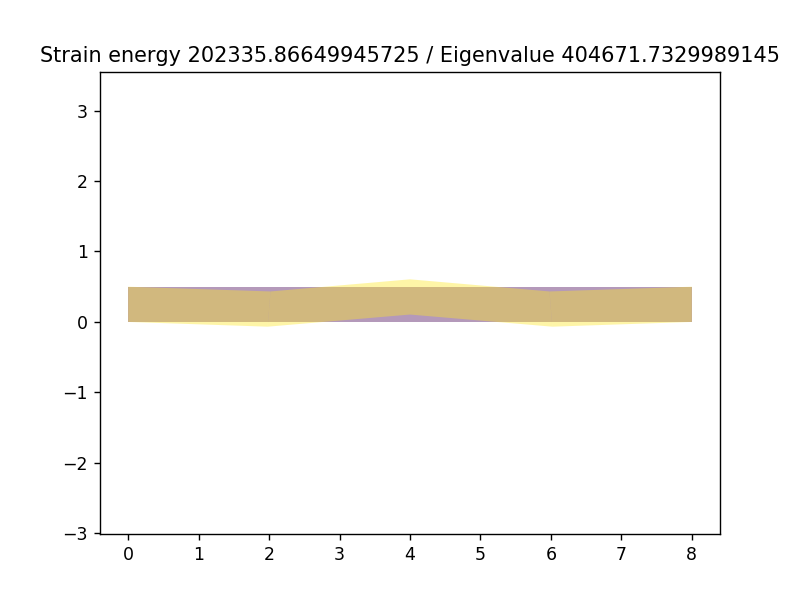

<IPython.core.display.Javascript object>


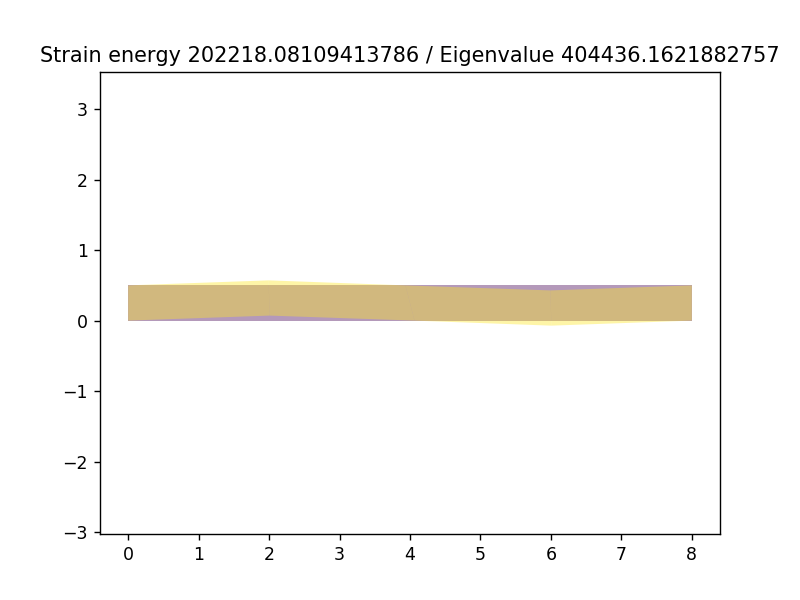

<IPython.core.display.Javascript object>


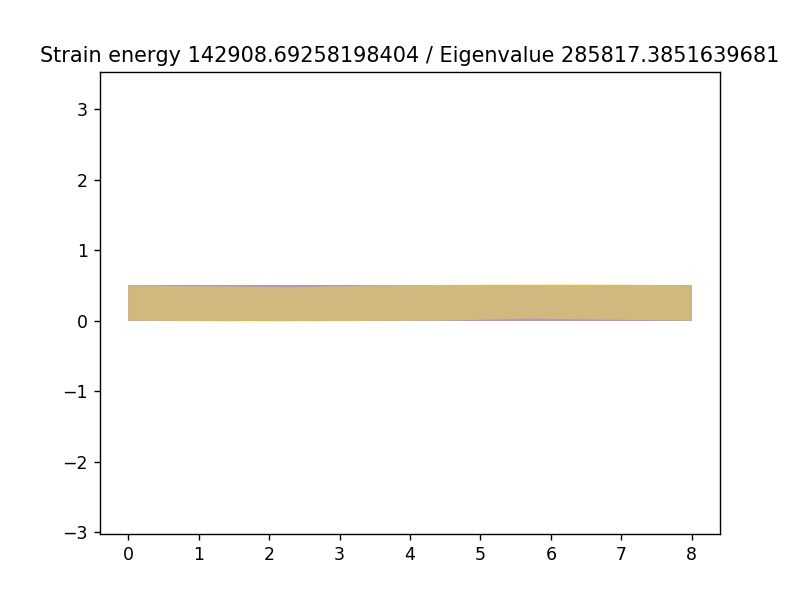

<IPython.core.display.Javascript object>


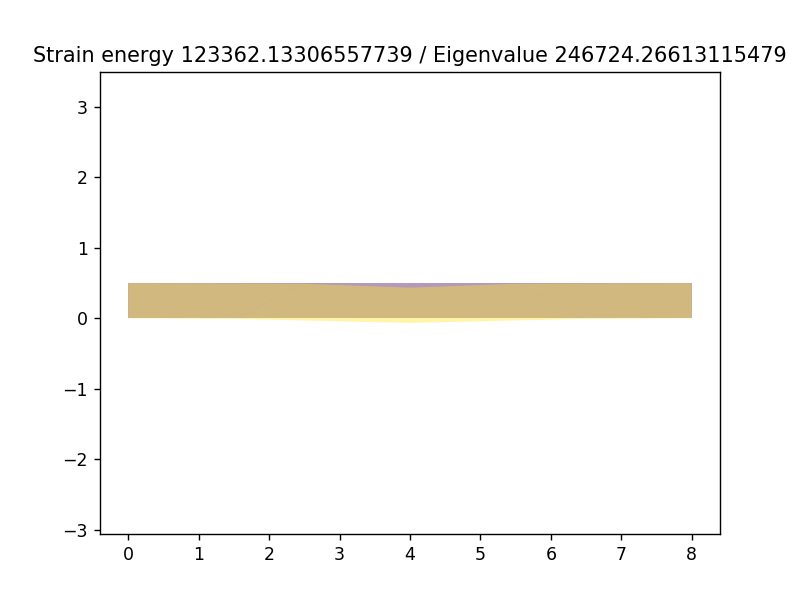

<IPython.core.display.Javascript object>


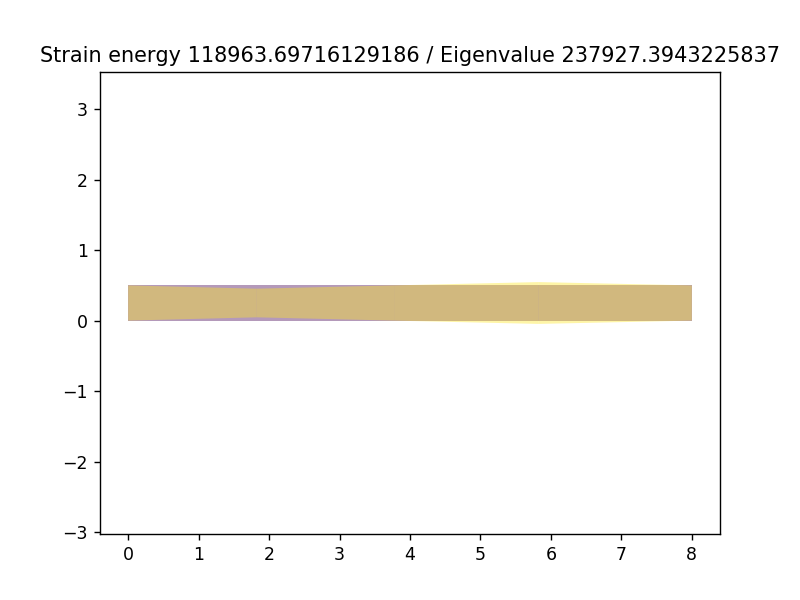

<IPython.core.display.Javascript object>


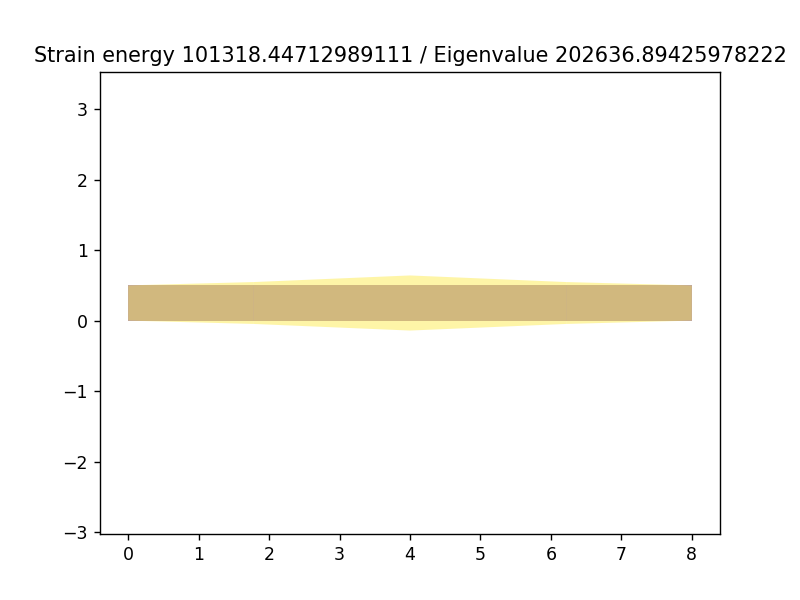

<IPython.core.display.Javascript object>


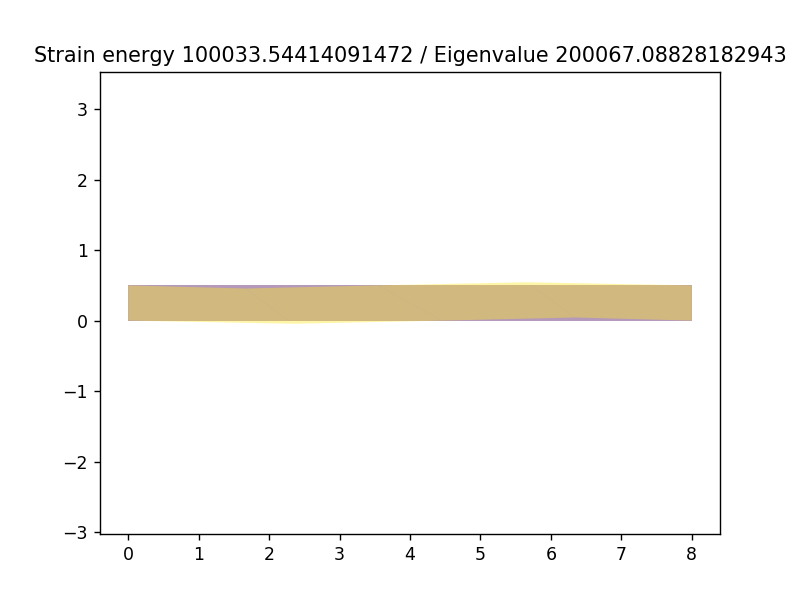

<IPython.core.display.Javascript object>


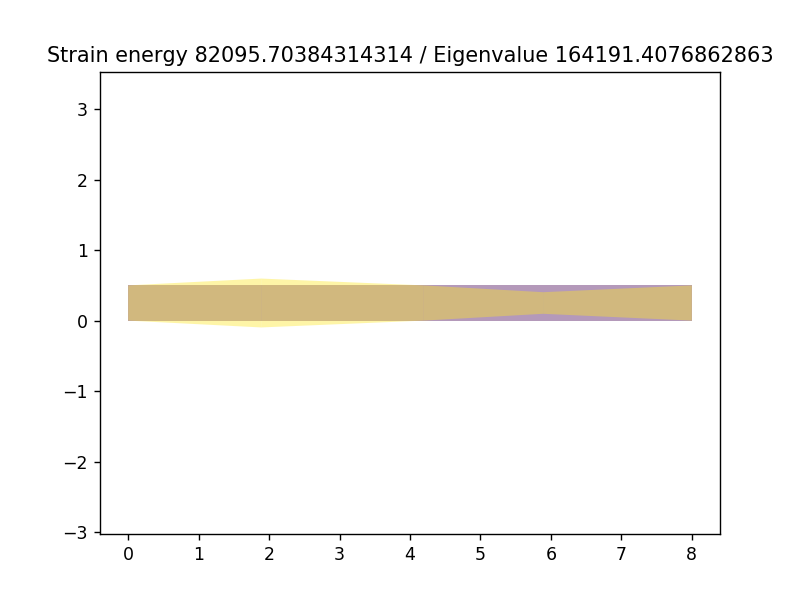

<IPython.core.display.Javascript object>


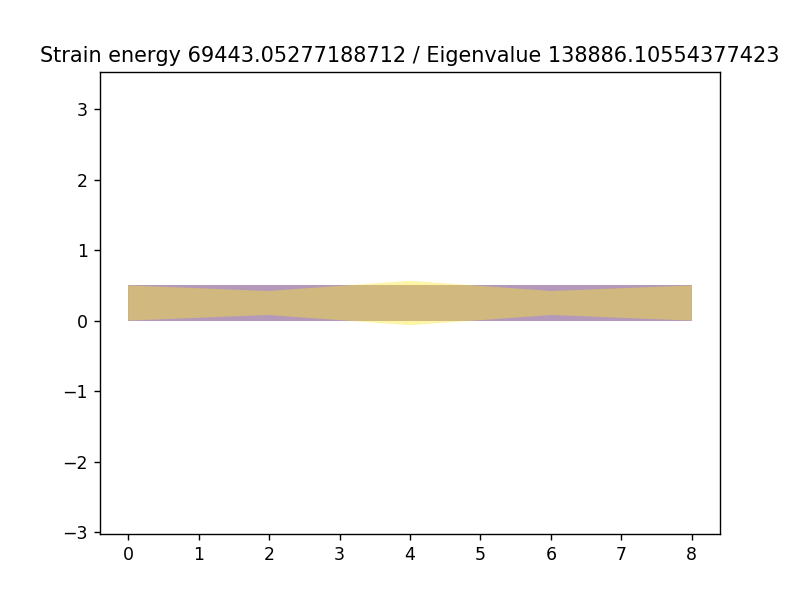

<IPython.core.display.Javascript object>


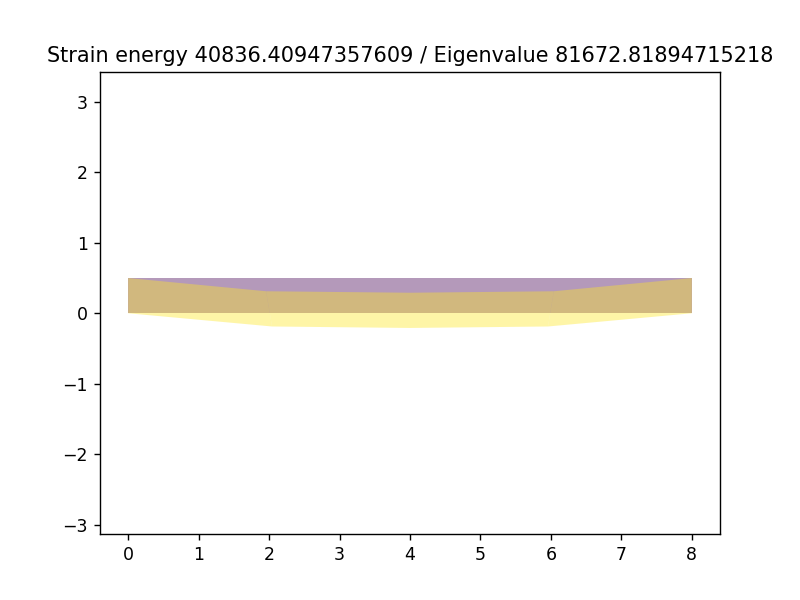

<IPython.core.display.Javascript object>


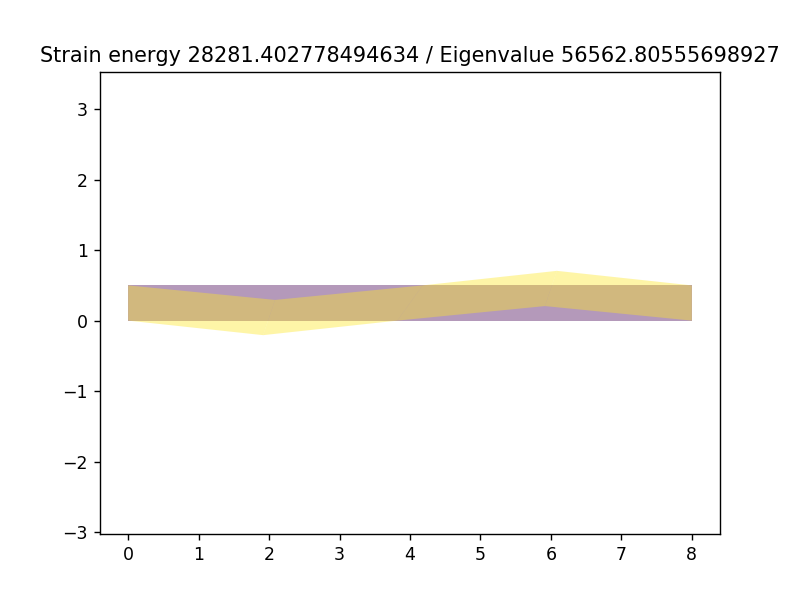

<IPython.core.display.Javascript object>


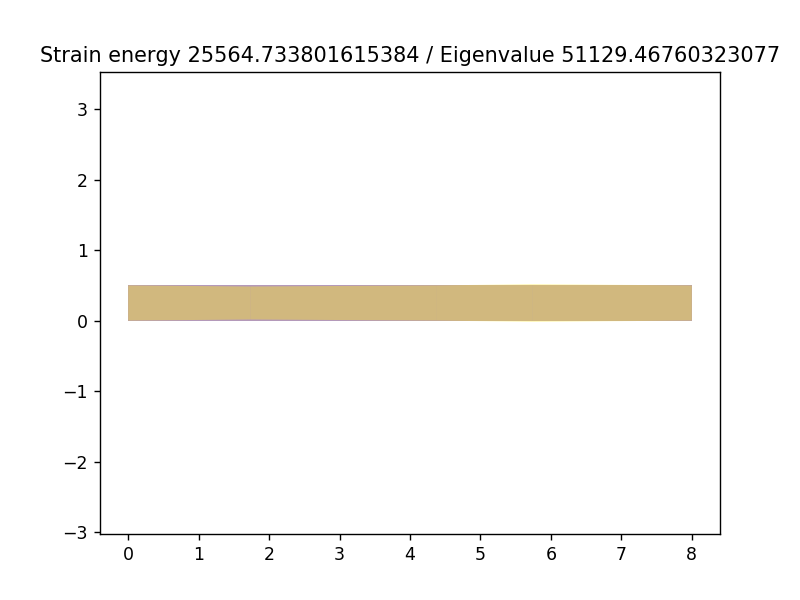

<IPython.core.display.Javascript object>


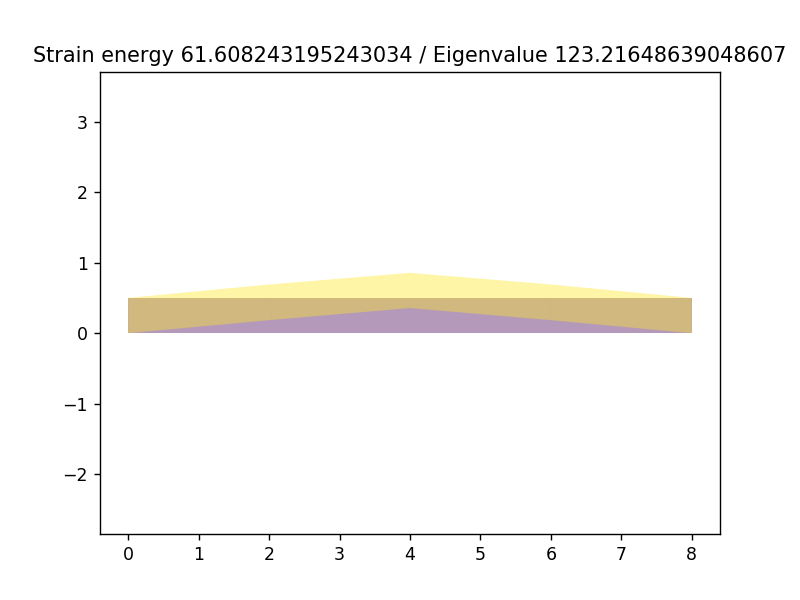

<IPython.core.display.Javascript object>


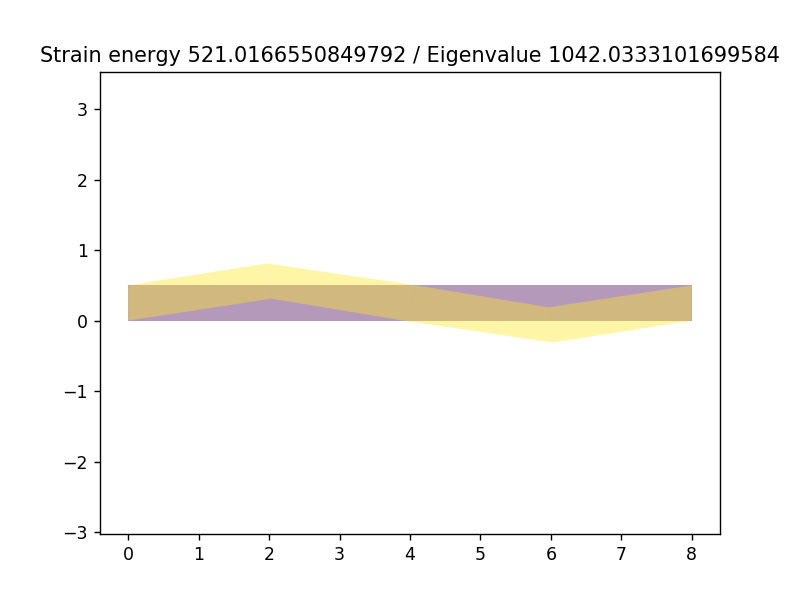

<IPython.core.display.Javascript object>


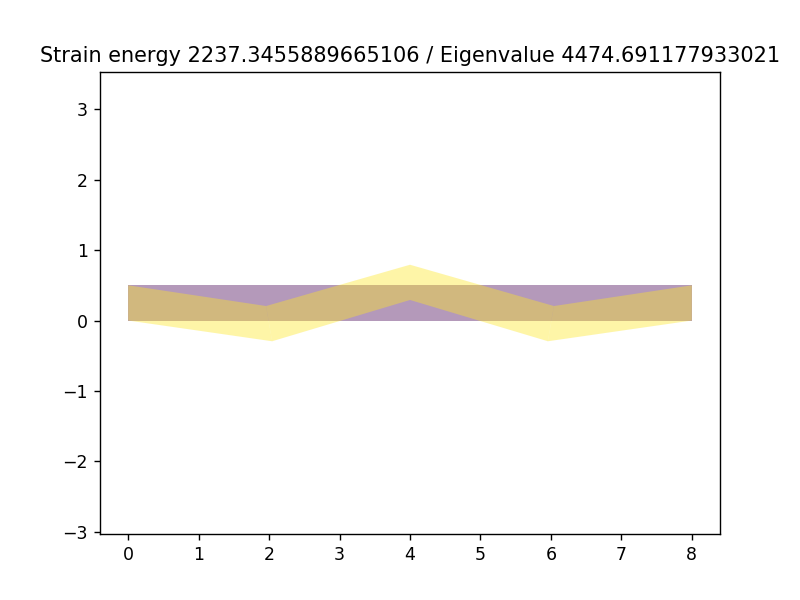

<IPython.core.display.Javascript object>


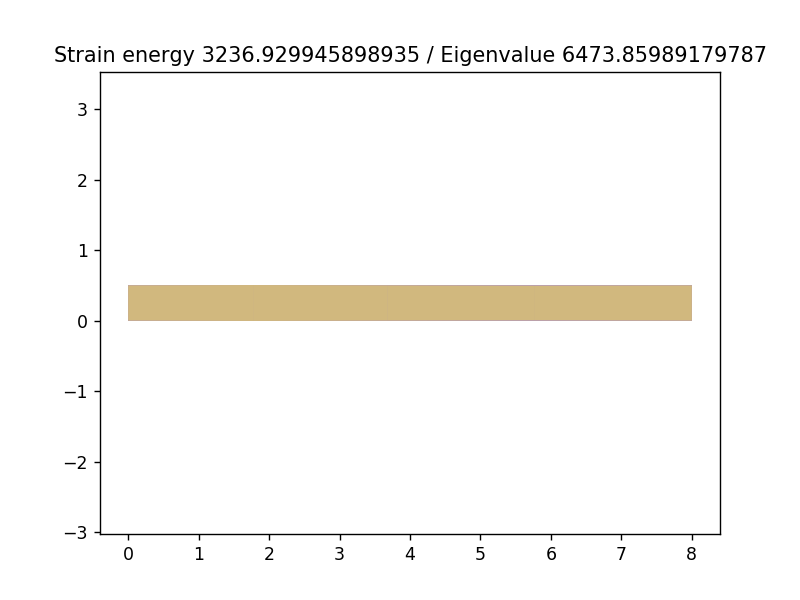

<IPython.core.display.Javascript object>


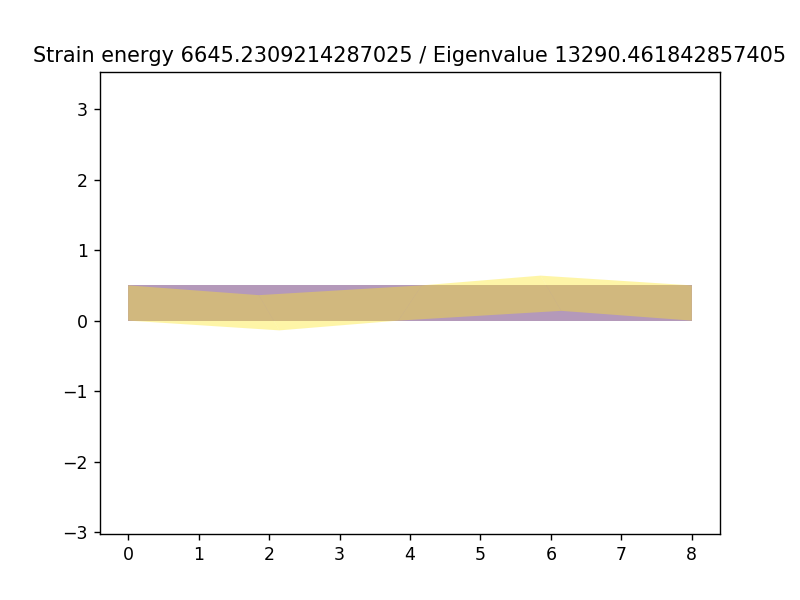

<IPython.core.display.Javascript object>


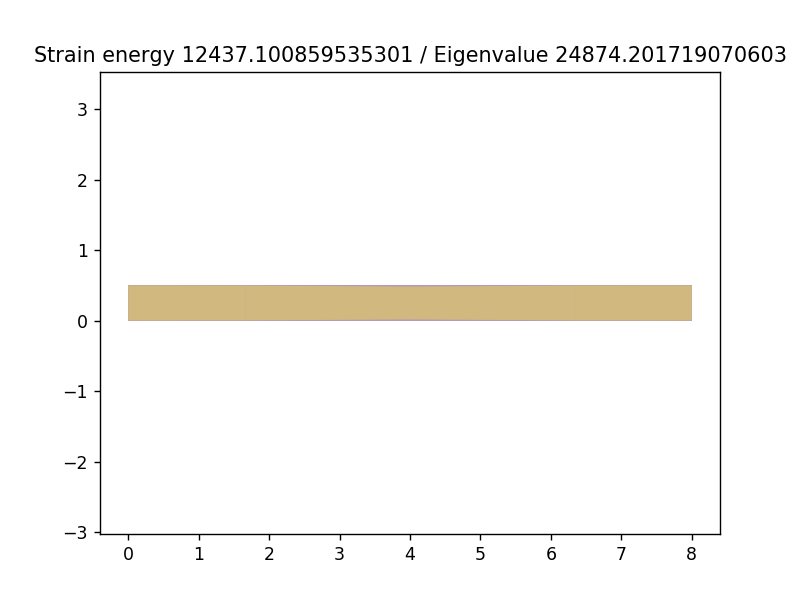

<IPython.core.display.Javascript object>


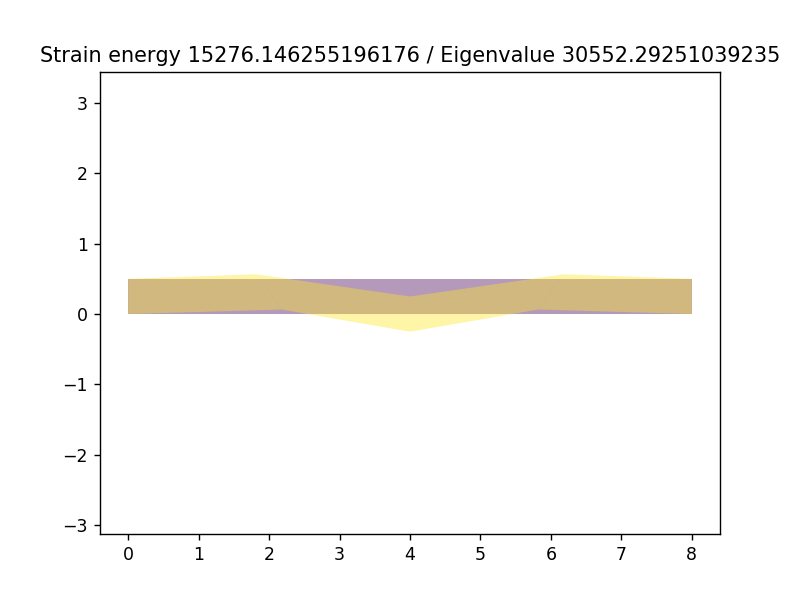

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from postprocess import PlotGeom

Eigenvalue, Eigenvector = np.linalg.eig(KFF)

for mode in range(len(fdof)):
    Umode = U.copy()
    Umode[fdof] = Eigenvector[:,mode]
    PlotGeom(elnodes,coor,nelem,nnodes,1.0,Umode)
    plt.title('Strain energy {} / Eigenvalue {}'.format(0.5*Eigenvalue[mode],Eigenvalue[mode]))

# Multiple Element Structure - Interpreting Displacements - Express as a linear combination of the eigenvectors $\boldsymbol{e}$
## $\boldsymbol{u}_{ff} = \sum_{i=0}^{modes} p_i \boldsymbol{e}_i$
## where $p_i$ indicates the ith participation coefficient of the ith eigenvector $\boldsymbol{e}_i$